In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


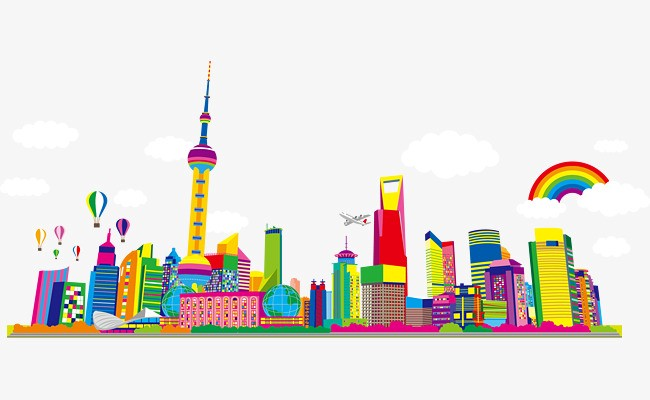

Hello and Welcome to the Notebook on "House Prices: Advanced Regression Techniques".

In this we will predict the House Price for the given test data using Different Regression Techniques.

I didn't put much concept here, instead I have written few one liner Q&A's for bigners to understand the concepts. Kept as simple as possibe.

If you like my work please Upvote and support. 
Thank You.

Ok, let's get started...

In [2]:
#Loading our Data
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
#Checking the Features of our Data
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
#Lets get that "Id" column separate
test_Id = test['Id']
data_Id = data['Id']

In [5]:
#Check if we have any Null Values in our Train Data
data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

## We have lot of Null Values in our Data.
### To deal with Null Values we have 2 methods:
1. Remove the Features which have Null Values.
  - We do this when we have lot of Null Values (~80%) in a Feature.
  - When we have considerable Null Values in Feature but it is contributing very less info to our target variable.
2. To Impute the Null values.
    * We do this when we have few Null Values in a Feature.
    * Even when we have lot of Null Values, considered the Feature provides key info to our target variable.

## What we are doing here?
1. We are droping the features which have high percentage of Null Values.
2. We also droping the Categorical Features which have Null values

In [6]:
data.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond','GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'MasVnrType'],
      axis = 1, inplace = True)

In [7]:
data.isnull().sum().sort_values(ascending=False).head(5)

BsmtFinType1    37
MasVnrArea       8
Electrical       1
SalePrice        0
TotalBsmtSF      0
dtype: int64

In [8]:
data.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1452.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411  ...   
std       20.645407   181.066207   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

In [9]:
#Check if we have any Null Values in our Test Data
test.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
dtype: int64

In [10]:
#Same method we apply here too!
test.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageCond','GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'MasVnrType'],
      axis = 1, inplace = True)

In [11]:
test.isnull().sum().sort_values(ascending=False).head(20)

BsmtFinType1    42
MasVnrArea      15
MSZoning         4
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFullBath     2
TotalBsmtSF      1
SaleType         1
BsmtUnfSF        1
BsmtFinSF1       1
GarageArea       1
GarageCars       1
Exterior1st      1
BsmtFinSF2       1
KitchenQual      1
Exterior2nd      1
ExterQual        0
RoofMatl         0
RoofStyle        0
dtype: int64

Let's divide our Data features to Impute the Null Values in Numerical Features and Encode the Cat Features Separately

In [12]:
num = data.select_dtypes(exclude=['object'])
obj = data.select_dtypes(exclude=['int64', 'float64'])
num_test = test.select_dtypes(exclude=['object'])
obj_test = test.select_dtypes(exclude=['int64', 'float64'])

### Imputing the Null Values in Numerical Features
#### Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.
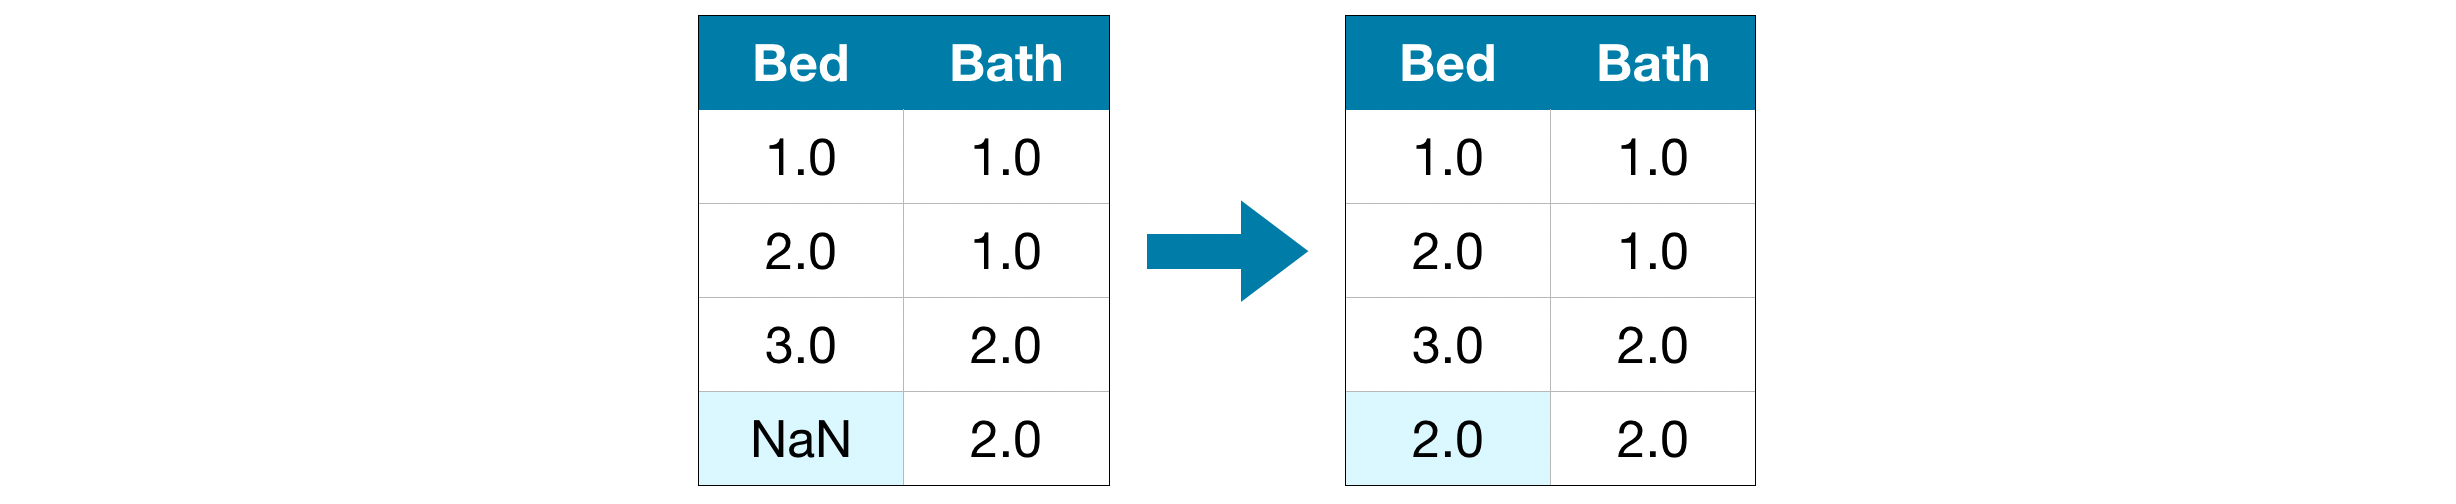

In [13]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_num = pd.DataFrame(my_imputer.fit_transform(num))
imputed_num.columns = num.columns
imputed_num.isnull().sum().sort_values(ascending=False).head(5)

SalePrice       0
BsmtFinSF2      0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

In [14]:
my_imputer_test = SimpleImputer()
imputed_num_test = pd.DataFrame(my_imputer_test.fit_transform(num_test))
imputed_num_test.columns = num_test.columns
imputed_num_test.isnull().sum().sort_values(ascending=False).head(5)

YrSold          0
BsmtFinSF2      0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
dtype: int64

### Encoding the Cat Features
#### Label encoding assigns each unique value to a different integer.
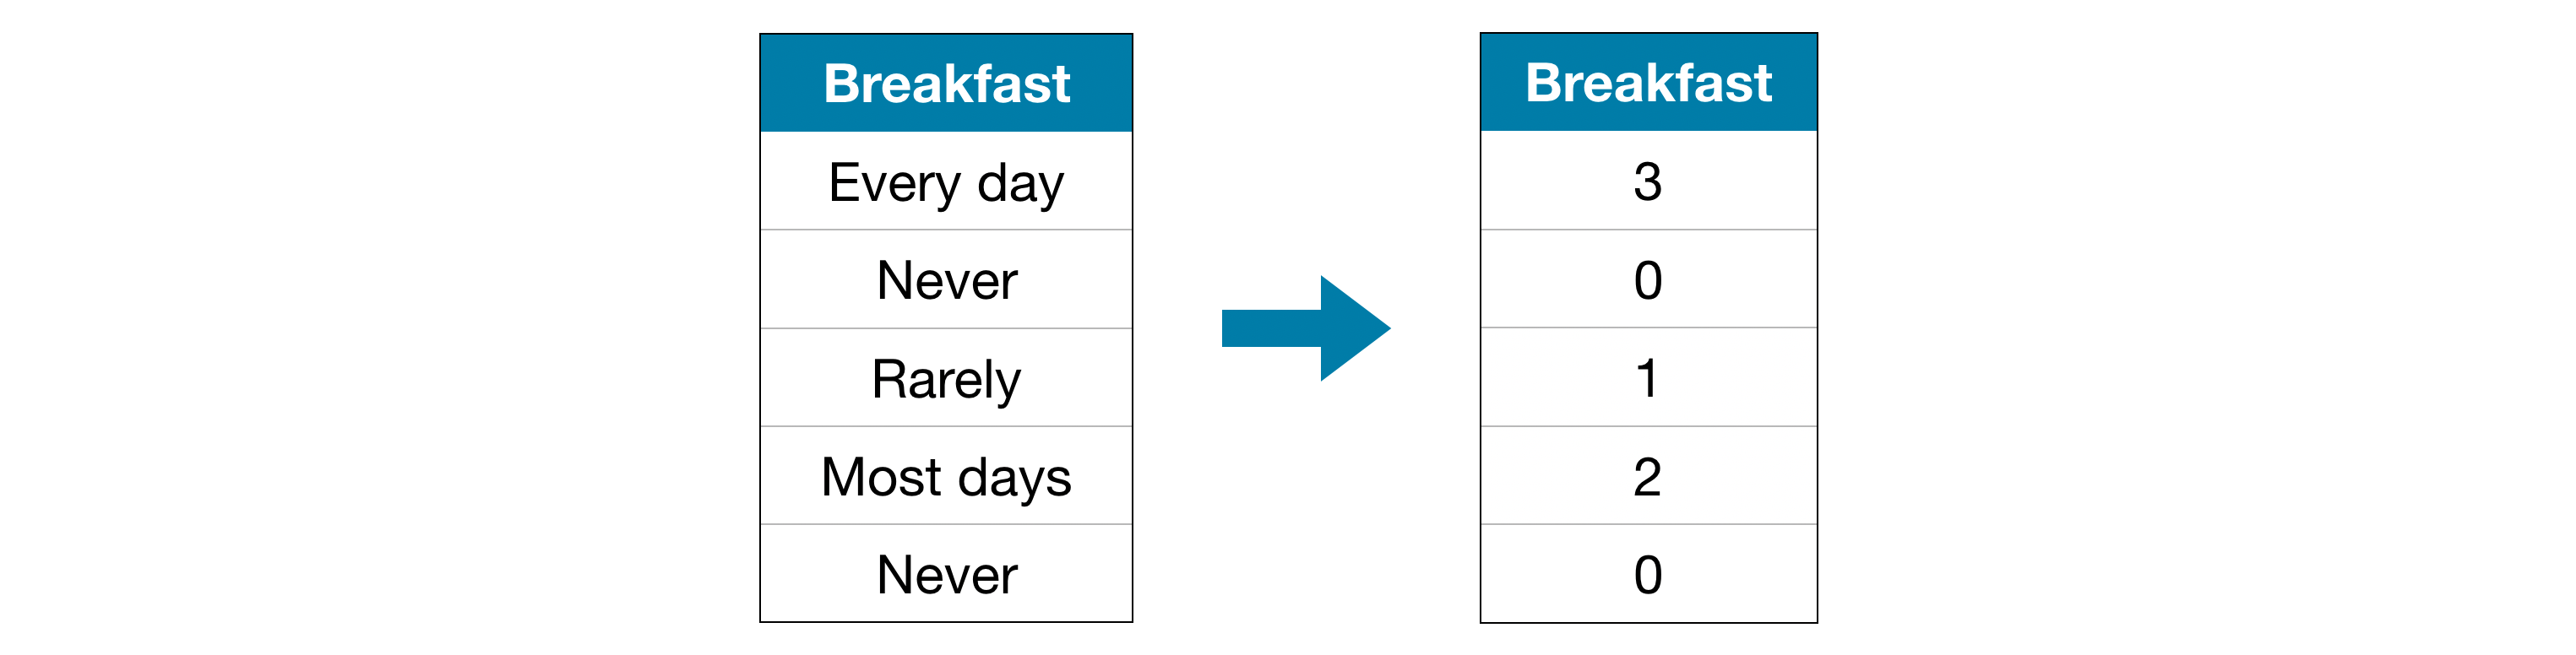

In [15]:
#Encoding the train cat variables
s = (obj.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [16]:
from sklearn.preprocessing import LabelEncoder
label_obj = obj.copy()
label_encoder = LabelEncoder()
for col in object_cols:
    label_obj[col] = label_encoder.fit_transform(obj[col].astype(str))

In [17]:
label_obj

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  BsmtFinType1  \
0             0             5           2           2  ...             2   
1             0            24           1           2  ...             0   
2             0             5           2           2  ...             2   
3             0             6           2           2  ...             0   
4             0            15           2           2  ...             2   
...         ...           ...         ...         ...  ...           ...   
1455          0             8           2           2  ...             5   
1456          0            14           2           2  ...             0   
1457          0             6           2           2  ...             2   
1458          0            12           2           2  ...             2   
1459          0             7           2           2  ...             1   

      Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0           1          0           1           4            2           6   
1           1          0           1           4            3           6   
2           1          0           1           4            2           6   
3           1          2           1           4            2           6   
4           1          0           1           4            2           6   
...       ...        ...         ...         ...          ...         ...   
1455        1          0           1           4            3           6   
1456        1          4           1           4            3           2   
1457        1          0           1           4            2           6   
1458        1          2           1           0            2           6   
1459        1          2           1           4            3           6   

      PavedDrive  SaleType  SaleCondition  
0              2         8              4  
1              2         8              4  
2              2         8              4  
3              2         8              0  
4              2         8              4  
...          ...       ...            ...  
1455           2         8              4  
1456           2         8              4  
1457           2         8              4  
1458           2         8              4  
1459           2         8              4  

[1460 rows x 29 columns]

In [18]:
#Encoding the test cat variables
s_test = (obj_test.dtypes == 'object')
object_cols_test = list(s_test[s_test].index)

print("Test Categorical variables:")
print(object_cols_test)

Test Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [19]:
label_obj_test = obj_test.copy()
label_encoder_test = LabelEncoder()
for col in object_cols_test:
    label_obj_test[col] = label_encoder_test.fit_transform(obj_test[col].astype(str))

In [20]:
label_obj_test

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            2       1         3            3          0          4   
1            3       1         0            3          0          0   
2            3       1         0            3          0          4   
3            3       1         0            3          0          4   
4            3       1         0            1          0          4   
...        ...     ...       ...          ...        ...        ...   
1454         4       1         3            3          0          4   
1455         4       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  BsmtFinType1  \
0             0            12           1           2  ...             4   
1             0            12           2           2  ...             0   
2             0             8           2           2  ...             2   
3             0             8           2           2  ...             2   
4             0            22           2           2  ...             0   
...         ...           ...         ...         ...  ...           ...   
1454          0            10           2           2  ...             5   
1455          0            10           2           2  ...             4   
1456          0            11           2           2  ...             0   
1457          0            11           2           2  ...             2   
1458          1            11           2           2  ...             3   

      Heating  HeatingQC  CentralAir  Electrical  KitchenQual  Functional  \
0           0          4           1           3            3           6   
1           0          4           1           3            2           6   
2           0          2           1           3            3           6   
3           0          0           1           3            2           6   
4           0          0           1           3            2           6   
...       ...        ...         ...         ...          ...         ...   
1454        0          2           1           3            3           6   
1455        0          4           1           3            3           6   
1456        0          0           1           3            3           6   
1457        0          4           1           3            3           6   
1458        0          0           1           3            3           6   

      PavedDrive  SaleType  SaleCondition  
0              2         8              4  
1              2         8              4  
2              2         8              4  
3              2         8              4  
4              2         8              4  
...          ...       ...            ...  
1454           2         8              4  
1455           2         8              0  
1456           2         8              0  
1457           2         8              4  
1458           2         8              4  

[1459 rows x 29 columns]

Checking if we have any Null Values in our Cat Features

In [21]:
label_obj.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
RoofMatl         0
Street           0
LotShape         0
LandContour      0
dtype: int64

In [22]:
label_obj_test.isnull().sum().sort_values(ascending=False).head()

SaleCondition    0
RoofMatl         0
Street           0
LotShape         0
LandContour      0
dtype: int64

### Since we have cleaned our Data, lets combine our Numerical and Cat features and check the Shape of our data.
#### Remember the number of features in train and test data should be the same.

In [23]:
cleaned_train = pd.concat([imputed_num, label_obj], axis =1)
cleaned_test = pd.concat([imputed_num_test, label_obj_test], axis =1)

In [24]:
y = cleaned_train['SalePrice']
X = cleaned_train.drop(['SalePrice'], axis = 1)

In [25]:
print(y.shape)
print(X.shape)
print(cleaned_test.shape)

(1460,)
(1460, 63)
(1459, 63)


## Let's see some Interesting visualizations from our Data

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation Heat Map - to check the correlations of different Features

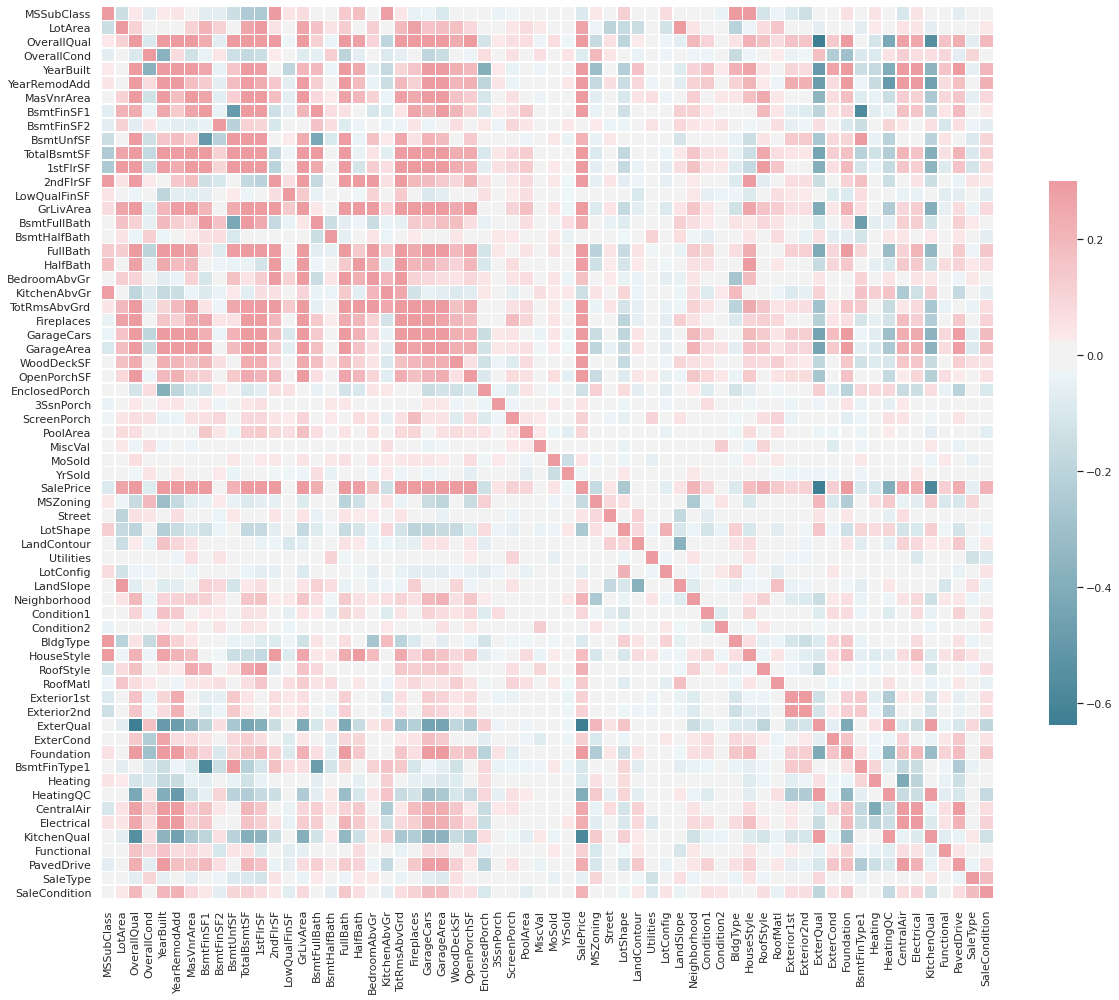

In [27]:
sns.set(style="white")
corr = cleaned_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Looks clumsy right? 
### OK. 
### We check only the variables which are highly correlated with our target variable - SalePrice

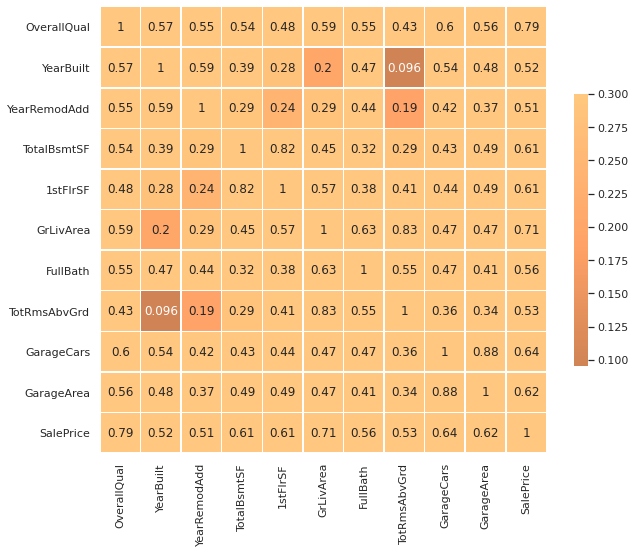

In [28]:
sns.set(style="white")
corrmat = cleaned_train.corr()
top_corr_features = corrmat.index[(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(cleaned_train[top_corr_features].corr(), annot=True, cmap='copper', 
                vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
corr['SalePrice'].sort_values(ascending=False).head(15)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
Name: SalePrice, dtype: float64

### Before writing this Notebook I have seen lot of Notebooks on this Dataset, I have seen scatter plots of single Features where I have observed Outliers. Since there are many Graphs and Plots in this Notebook also which cover those plots so I would prefer not to show each and every individual feature plots here. 

# Outliers

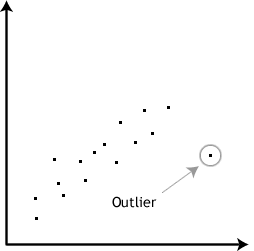

### 1) What are Outliers?
### Outliers are the points which fall away from the our general data like the one shown in above diagram.

### 2) Is dealing the Outliers Important?
### Yes. It is Very Important because the outliers is considered as bad data points and it will effect our Linear Regression Model and Regression Equation

### 3) So, How to Deal with this Outliers?
### To correct and remove Outliers we have different methods. Here I have used 'zscores' method. 

[Read more about Detecting and Removing the Outliers.](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

In [30]:
from scipy import stats
z1 = np.abs(stats.zscore(cleaned_train))
print(z1)

threshold = 3
print(np.where(z1 > 3))
cleaned_train_2 = cleaned_train.copy()
cleaned_train_OL = cleaned_train_2[(z1 < 3).all(axis=1)].reset_index(drop=True)

[[0.07337496 0.20714171 0.65147924 ... 0.28974476 0.31386709 0.2085023 ]
 [0.87256276 0.09188637 0.07183611 ... 0.28974476 0.31386709 0.2085023 ]
 [0.07337496 0.07347998 0.65147924 ... 0.28974476 0.31386709 0.2085023 ]
 ...
 [0.30985939 0.14781027 0.65147924 ... 0.28974476 0.31386709 0.2085023 ]
 [0.87256276 0.08016039 0.79515147 ... 0.28974476 0.31386709 0.2085023 ]
 [0.87256276 0.05811155 0.79515147 ... 0.28974476 0.31386709 0.2085023 ]]
(array([   1,    3,    3, ..., 1458, 1458, 1459]), array([16, 27, 63, ...,  8, 58, 25]))


In [31]:
cleaned_train_OL.shape

(664, 64)

### After removing Outliers we have only 664 rows!!! that's less than half of our original data (1460). 



### From here on I'll work on both the datasets (viz, Our Original Data Set and the Data after removing Outliers) side by side to check the effect of outliers on the data.  

### Let's start with the Correlation Heat Map

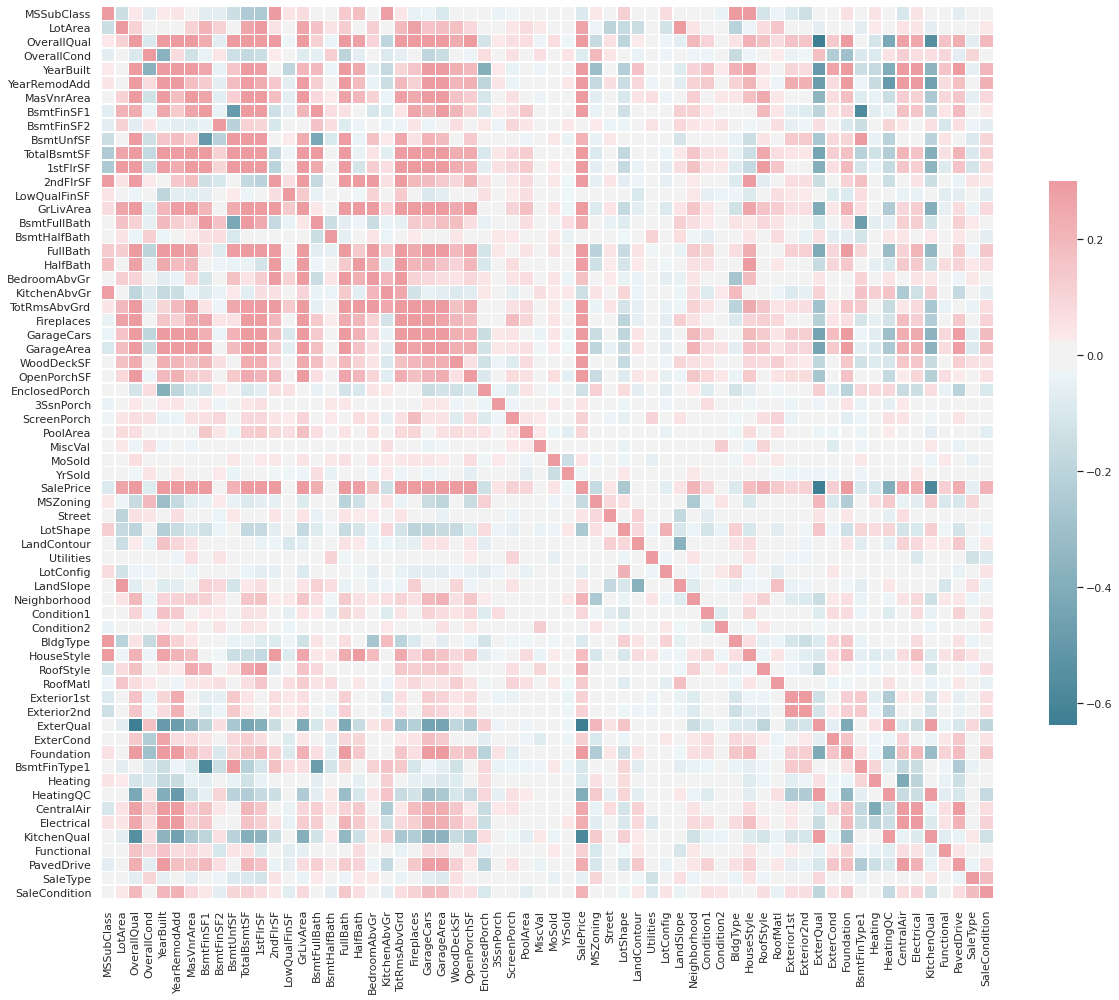

In [32]:
sns.set(style="white")
corr_OL = cleaned_train_OL.corr()
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

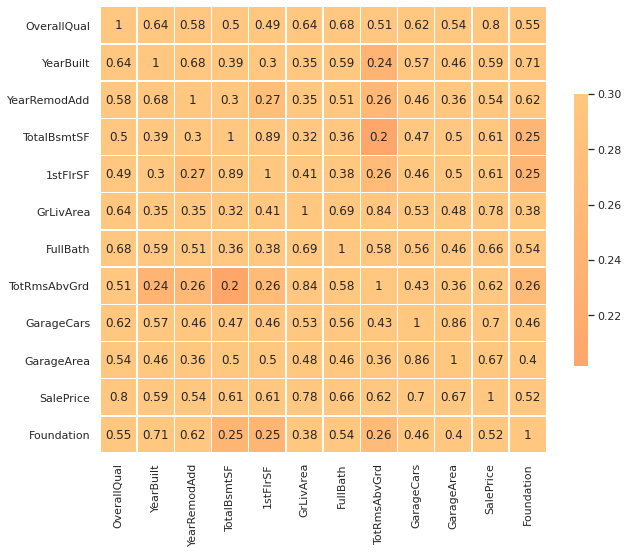

In [33]:
sns.set(style="white")
corrmat_OL = cleaned_train_OL.corr()
top_corr_features = corrmat_OL.index[(corrmat_OL["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(cleaned_train_OL[top_corr_features].corr(), annot=True, cmap='copper', 
                vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Comparing the top correlated features with our target variable in Data Without Removing Outliers and After Removing Outliers

In [34]:
print("Top correlated features with our target variable Without Removing Outliers")
print(corr['SalePrice'].sort_values(ascending=False).head(15)) 
print("_______________________________")
print("Top correlated features with our target variable After Removing Outliers")
print(corr_OL['SalePrice'].sort_values(ascending=False).head(15))

Top correlated features with our target variable Without Removing Outliers
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
Fireplaces      0.466929
BsmtFinSF1      0.386420
Foundation      0.382479
Name: SalePrice, dtype: float64
_______________________________
Top correlated features with our target variable After Removing Outliers
SalePrice       1.000000
OverallQual     0.803339
GrLivArea       0.777881
GarageCars      0.699275
GarageArea      0.665342
FullBath        0.663258
TotRmsAbvGrd    0.617971
TotalBsmtSF     0.611963
1stFlrSF        0.610137
YearBuilt       0.589956
YearRemodAdd    0.535676
Foundation      0.524696
MasVnrArea      0.420658
LotArea         0.419917
OpenPorchSF     0.413983
Name: SalePrice, dtype: float64


### we observe that the correlations have increased and few new Features cam into light.
#### Here are the Major Observations:
##### Foundation Increased by 0.14
##### TotRmsAbvGrd Increased by 0.08
##### GrLivArea Increased by 0.07
##### GarageArea Increased by 0.04
##### OverallQual Increased by 0.01

# Distribution of our Target Variable - SalePrice

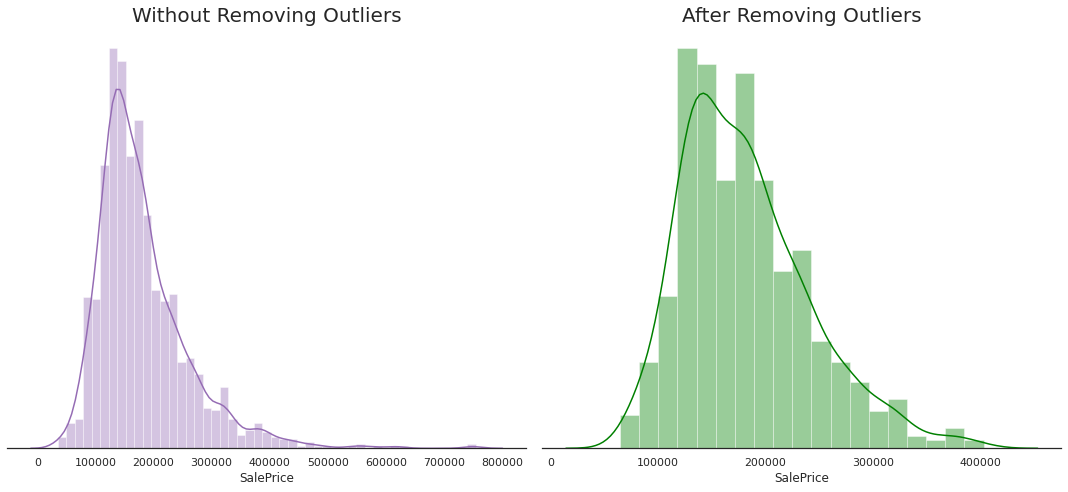

In [35]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)
sns.distplot(cleaned_train['SalePrice'], kde=True, color="m", ax=axes[0])
sns.distplot(cleaned_train_OL['SalePrice'], kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

### 1. Obsering the graphs side by side we can say that left one is Positively skewed and Leptokurtic. The tail of curve is very steep and the peak is sharp. 
### 2. The right one is less skewed and Mesokurtic and almost following the Normal Distribution. We don't see much data in tails and the peak is less sharp.

### I don't want to go into the basics of what Skewness and Kurtosis is. Please check the figure below. 
### [Read Here](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)
### [Watch Here](https://www.youtube.com/watch?v=lK7nLzxiAQQ)
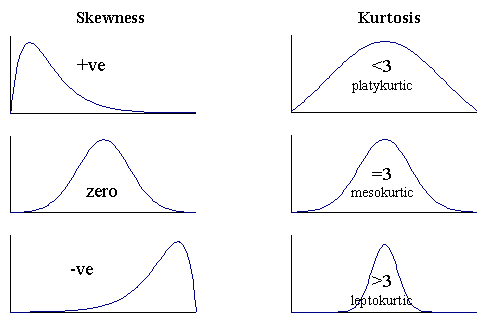

### Let's look at the distribution of values of the most correlated Features
# I) OverallQual

In [36]:
cleaned_train['OverallQual']

0       7.0
1       6.0
2       7.0
3       7.0
4       8.0
       ... 
1455    6.0
1456    6.0
1457    7.0
1458    5.0
1459    5.0
Name: OverallQual, Length: 1460, dtype: float64

Text(0.5, 1.0, 'After Removing Outliers')

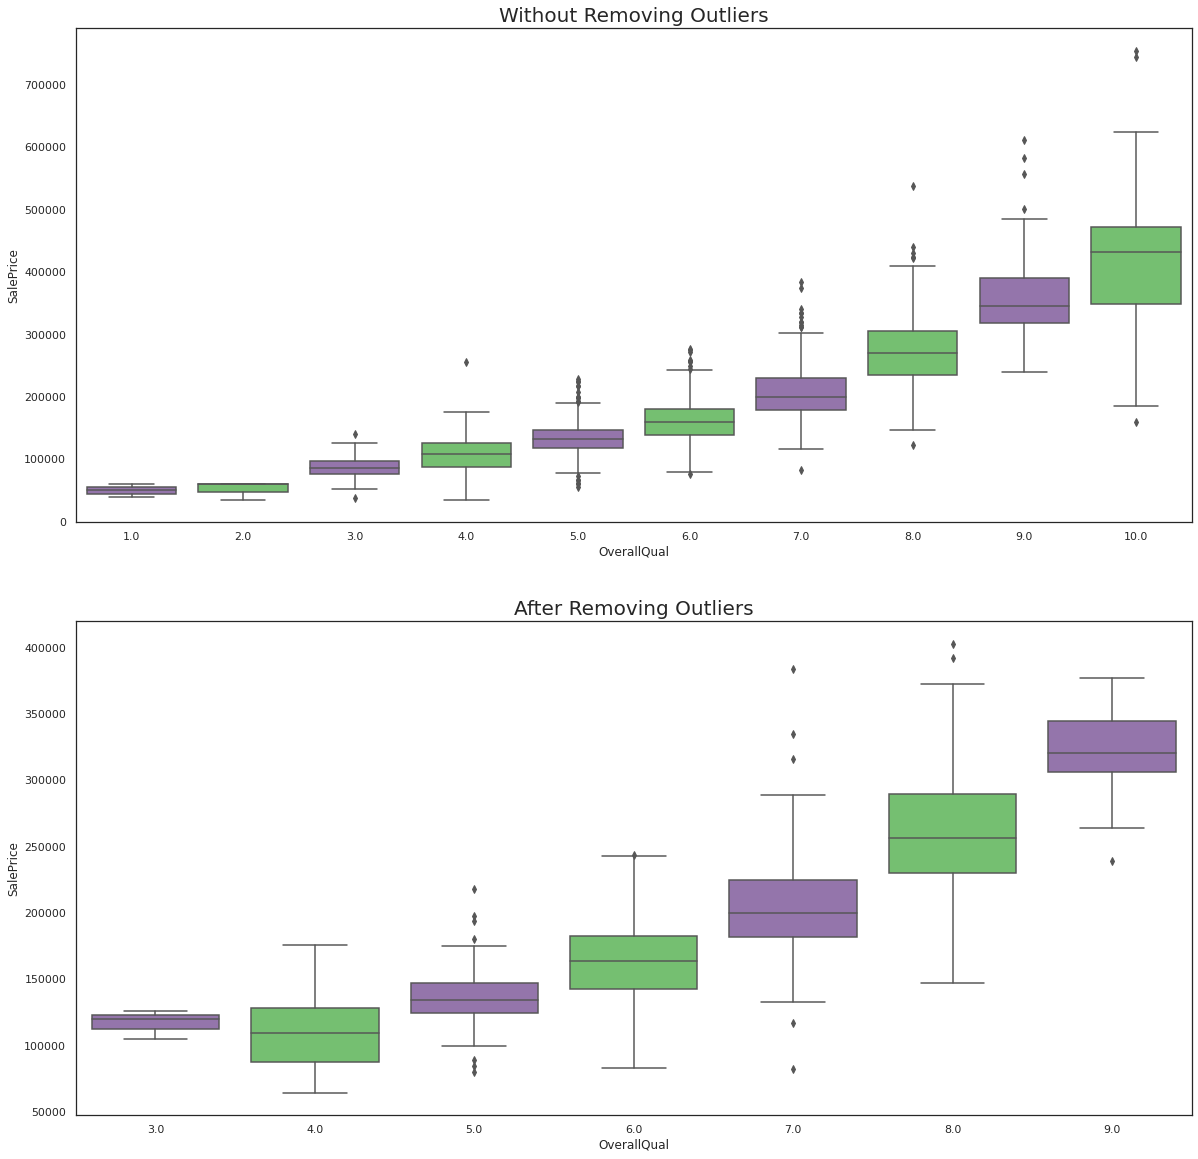

In [37]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), nrows=2, sharey=False)

sns.boxplot(cleaned_train['OverallQual'], cleaned_train['SalePrice'], palette=["m", "g"],  ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.boxplot(cleaned_train_OL['OverallQual'],cleaned_train_OL['SalePrice'], palette=["m", "g"],ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

# II) GrLivArea

In [38]:
#Analysis after removing outliers - GrLivArea
cleaned_train['GrLivArea'].head()

0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: GrLivArea, dtype: float64

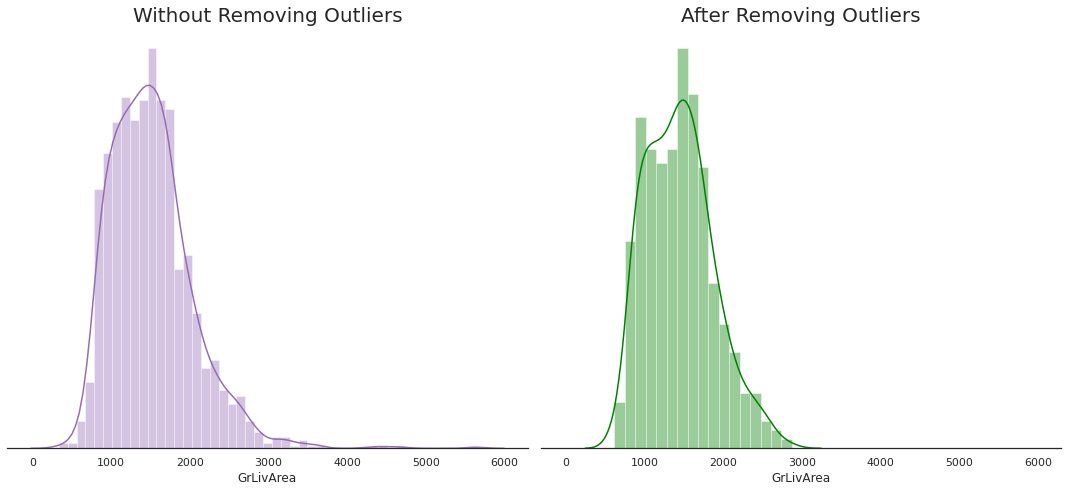

In [39]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(cleaned_train['GrLivArea'], kde=True, color="m", ax=axes[0])
sns.distplot(cleaned_train_OL['GrLivArea'], kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

## Observations:
### 1. The left curve is somewhat Positively Skewed and Leptokurtic.
### 2. The right curve has hardly any skewness but it is still Leptokurtic.

Text(0.5, 1.0, 'After Removing Outliers')

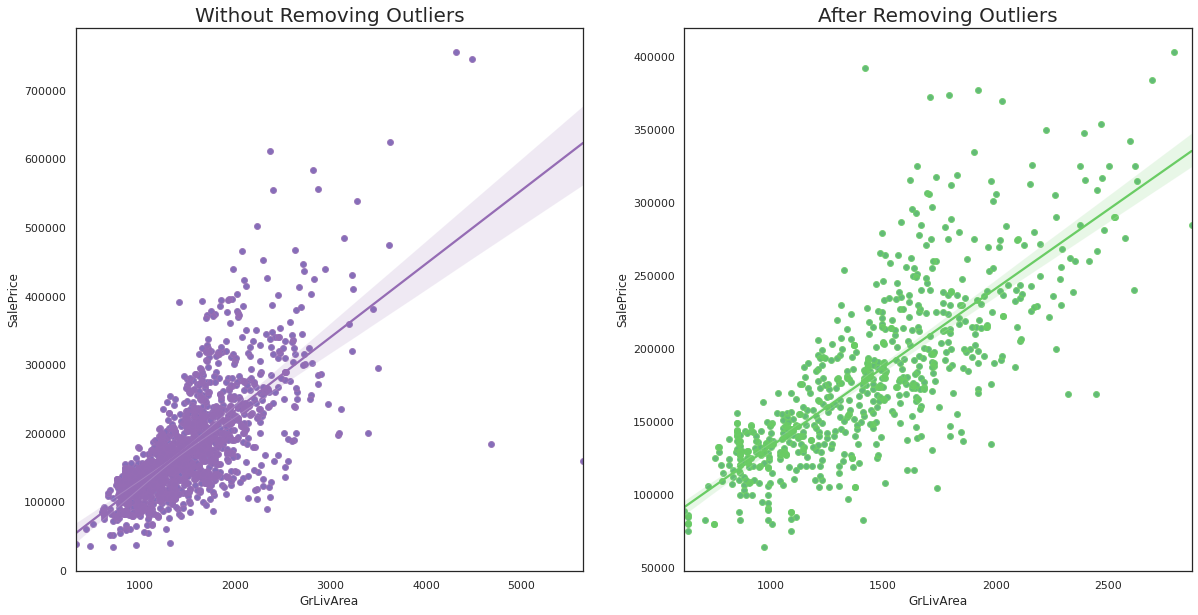

In [40]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2, sharey=False)

sns.scatterplot(cleaned_train['GrLivArea'], cleaned_train['SalePrice'],  ax=ax1)
sns.regplot(cleaned_train['GrLivArea'], cleaned_train['SalePrice'], color ='m', ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.scatterplot(cleaned_train_OL['GrLivArea'],cleaned_train_OL['SalePrice'], ax=ax2)
sns.regplot(cleaned_train_OL['GrLivArea'],cleaned_train_OL['SalePrice'],color ='g', ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. In left plot the points are highly concentrated in the starting of the regression line and have few outliers above and below the regression line.

### 2. In right plot the points are scattered almost equally above and below of the regression line.

# III) GarageCars

In [41]:
cleaned_train['GarageCars'].unique()

array([2., 3., 1., 0., 4.])

Text(0.5, 1.0, 'After Removing Outliers')

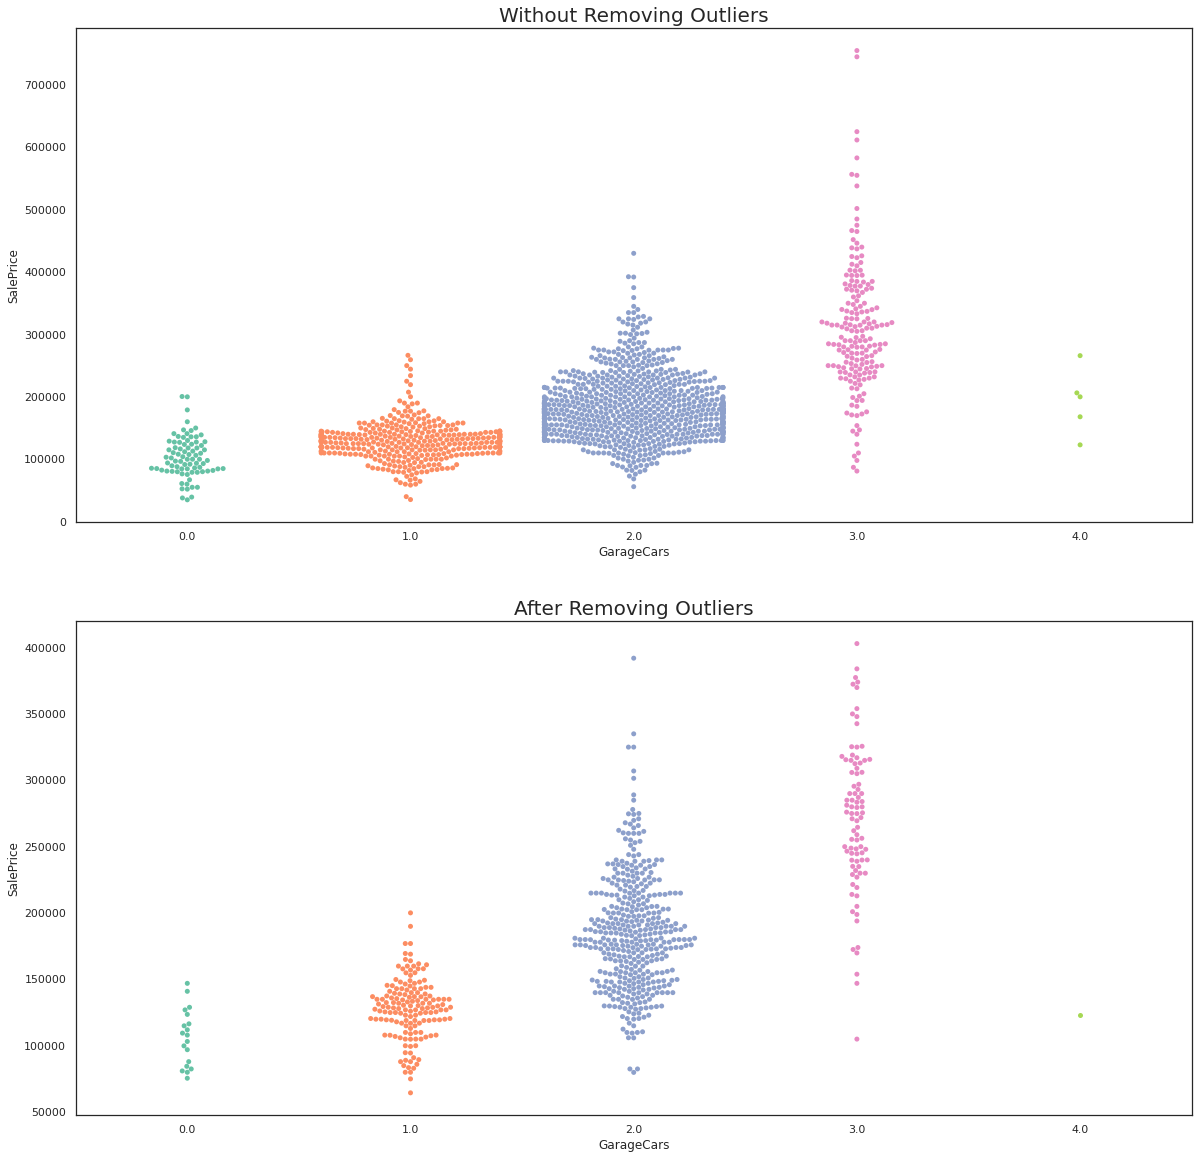

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), nrows=2, sharey=False)

sns.swarmplot(cleaned_train['GarageCars'], cleaned_train['SalePrice'],  palette="Set2", ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.swarmplot(cleaned_train_OL['GarageCars'],cleaned_train_OL['SalePrice'], palette="Set2", ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. The data points of each type are concentrated in and around in the above figure.
### 2. The data points of each type are scattered in the below figure. 

# IV) GarageArea

In [43]:
cleaned_train['GarageArea'].head()

0    548.0
1    460.0
2    608.0
3    642.0
4    836.0
Name: GarageArea, dtype: float64

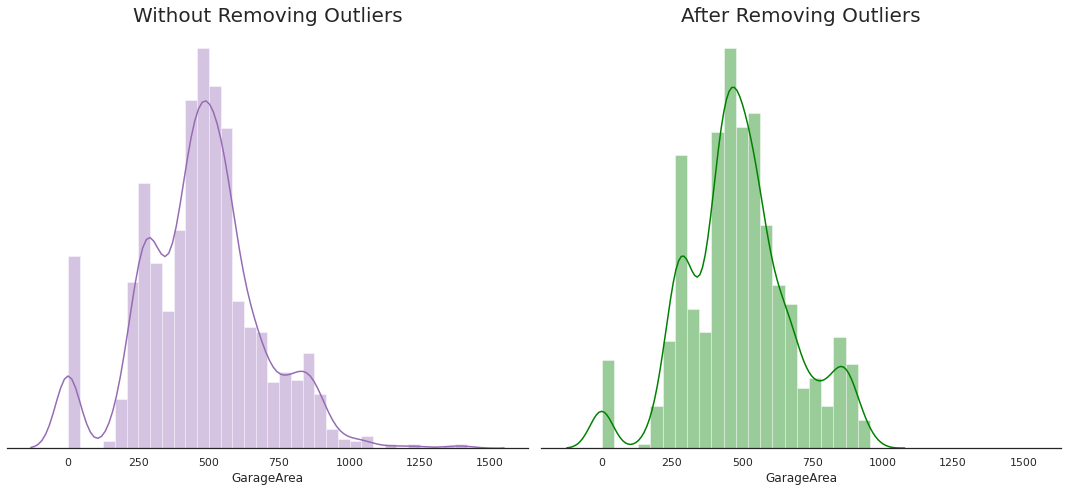

In [44]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(cleaned_train['GarageArea'], kde=True, color="m", ax=axes[0])
sns.distplot(cleaned_train_OL['GarageArea'], kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

## Observation:
### Removing Outliers has alomost no effect on distribution of 'GarageArea'

Text(0.5, 1.0, 'After Removing Outliers')

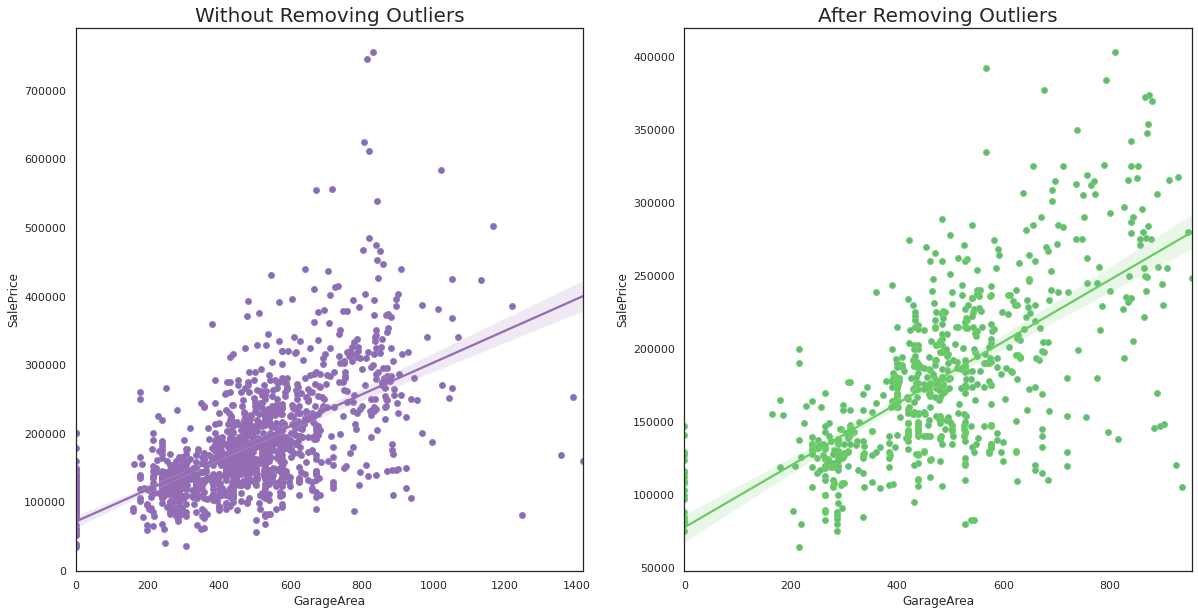

In [45]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2, sharey=False)

sns.scatterplot(cleaned_train['GarageArea'], cleaned_train['SalePrice'],  ax=ax1)
sns.regplot(cleaned_train['GarageArea'], cleaned_train['SalePrice'], color ='m', ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.scatterplot(cleaned_train_OL['GarageArea'],cleaned_train_OL['SalePrice'], ax=ax2)
sns.regplot(cleaned_train_OL['GarageArea'],cleaned_train_OL['SalePrice'],color ='g', ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)


## Observations:
### 1. In left plot the points are highly concentrated in the starting of the regression line and have few outliers above and below the regression line.

### 2. In right plot the points are scattered almost equally above and below of the regression line yet we have line of values at value 0. 

# V) TotalBsmtSF

In [46]:
cleaned_train['TotalBsmtSF'].head()

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
Name: TotalBsmtSF, dtype: float64

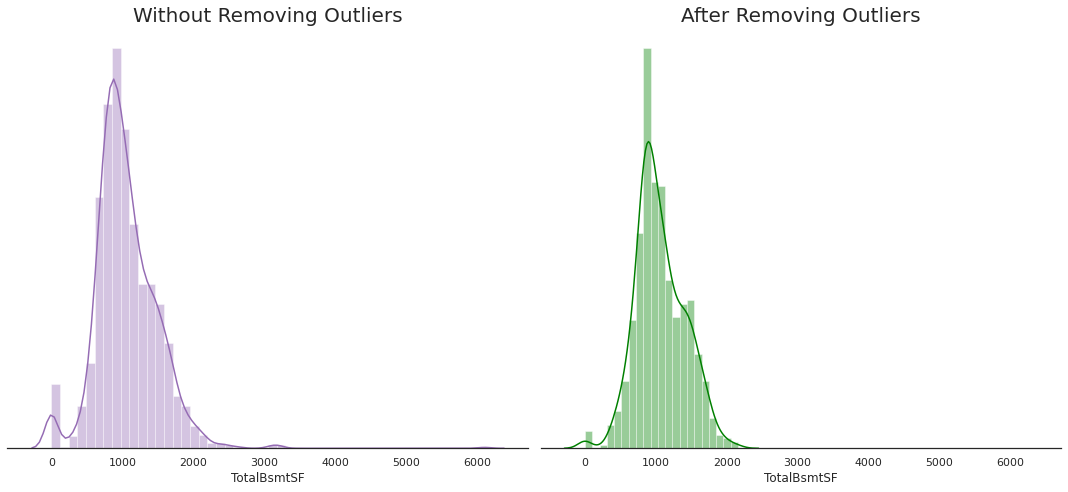

In [47]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(cleaned_train['TotalBsmtSF'], kde=True, color="m", ax=axes[0])
sns.distplot(cleaned_train_OL['TotalBsmtSF'], kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

## Observation:
### 1. The height of the curve has lowered.

Text(0.5, 1.0, 'After Removing Outliers')

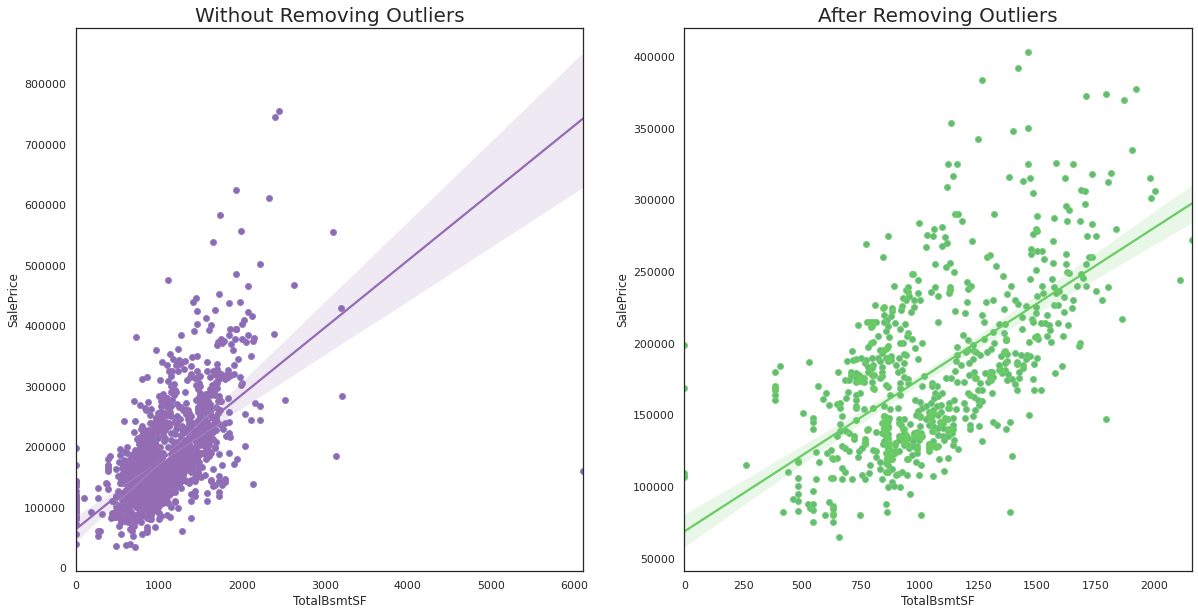

In [48]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2, sharey=False)

sns.scatterplot(cleaned_train['TotalBsmtSF'], cleaned_train['SalePrice'],  ax=ax1)
sns.regplot(cleaned_train['TotalBsmtSF'], cleaned_train['SalePrice'], color ='m',ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.scatterplot(cleaned_train_OL['TotalBsmtSF'],cleaned_train_OL['SalePrice'], ax=ax2)
sns.regplot(cleaned_train_OL['TotalBsmtSF'],cleaned_train_OL['SalePrice'], color ='g',ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. In left plot the points are highly concentrated in the starting of the regression line and have few outliers above and below the regression line.

### 2. In right plot the points are scattered almost equally above and below of the regression line and few points highly above the curve.

# VI) FullBath

In [49]:
cleaned_train['FullBath'].unique()

array([2., 1., 3., 0.])

Text(0.5, 1.0, 'After Removing Outliers')

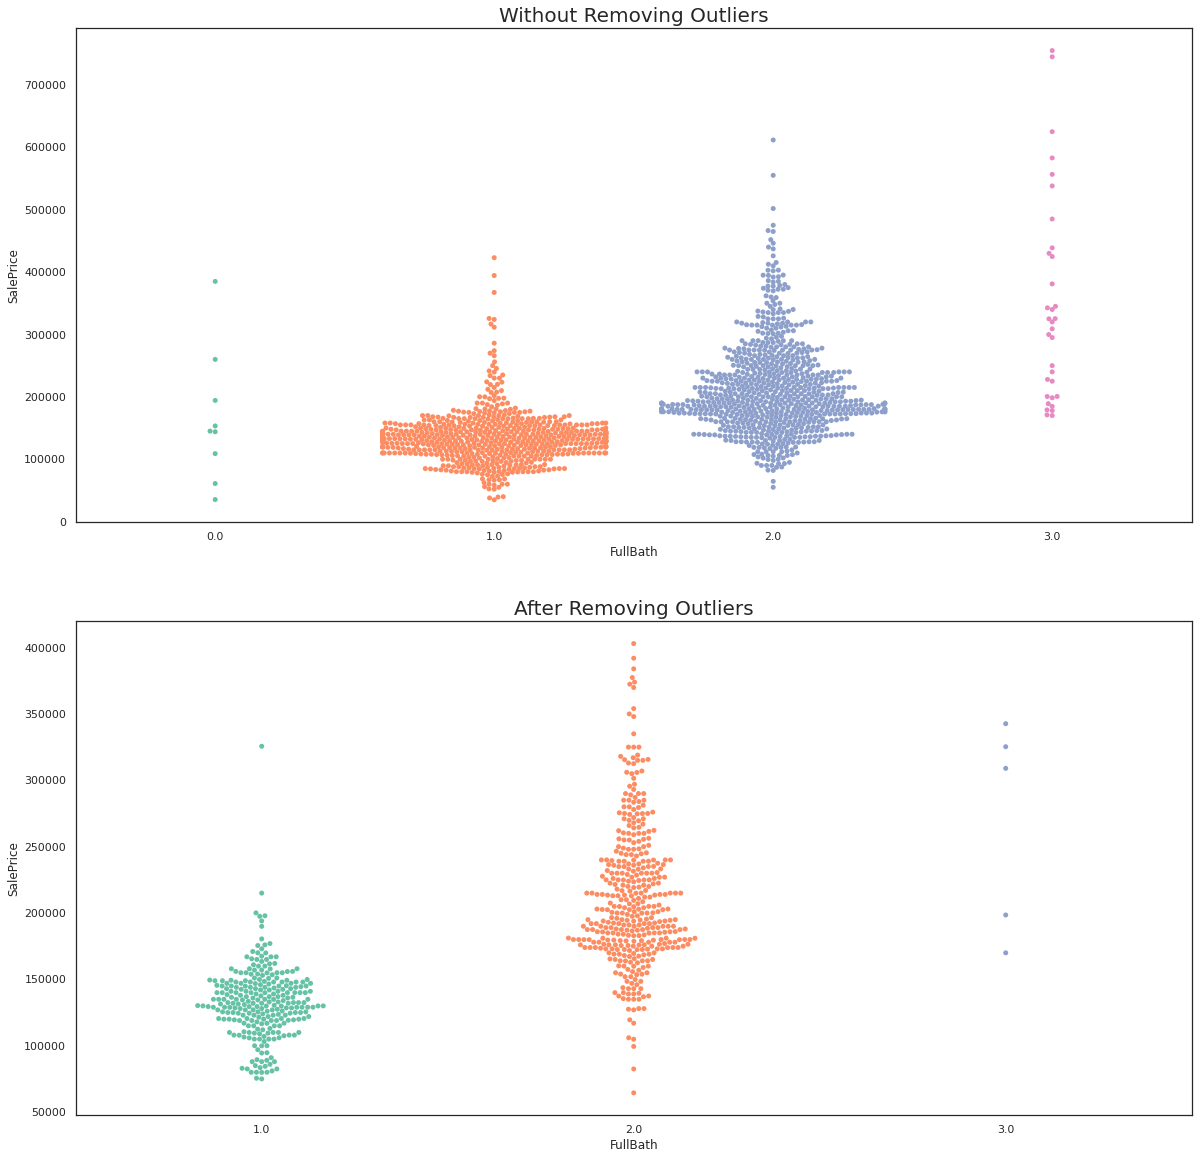

In [50]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), nrows=2, sharey=False)

sns.swarmplot(cleaned_train['FullBath'], cleaned_train['SalePrice'],  palette="Set2",ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.swarmplot(cleaned_train_OL['FullBath'],cleaned_train_OL['SalePrice'], palette="Set2",ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. The data points of each type are concentrated in and around in the above figure.
### 2. The data points of each type are scattered and we have no type '0' in the below figure.

# VII) TotRmsAbvGrd

In [51]:
cleaned_train['TotRmsAbvGrd'].unique()

array([ 8.,  6.,  7.,  9.,  5., 11.,  4., 10., 12.,  3.,  2., 14.])

Text(0.5, 1.0, 'After Removing Outliers')

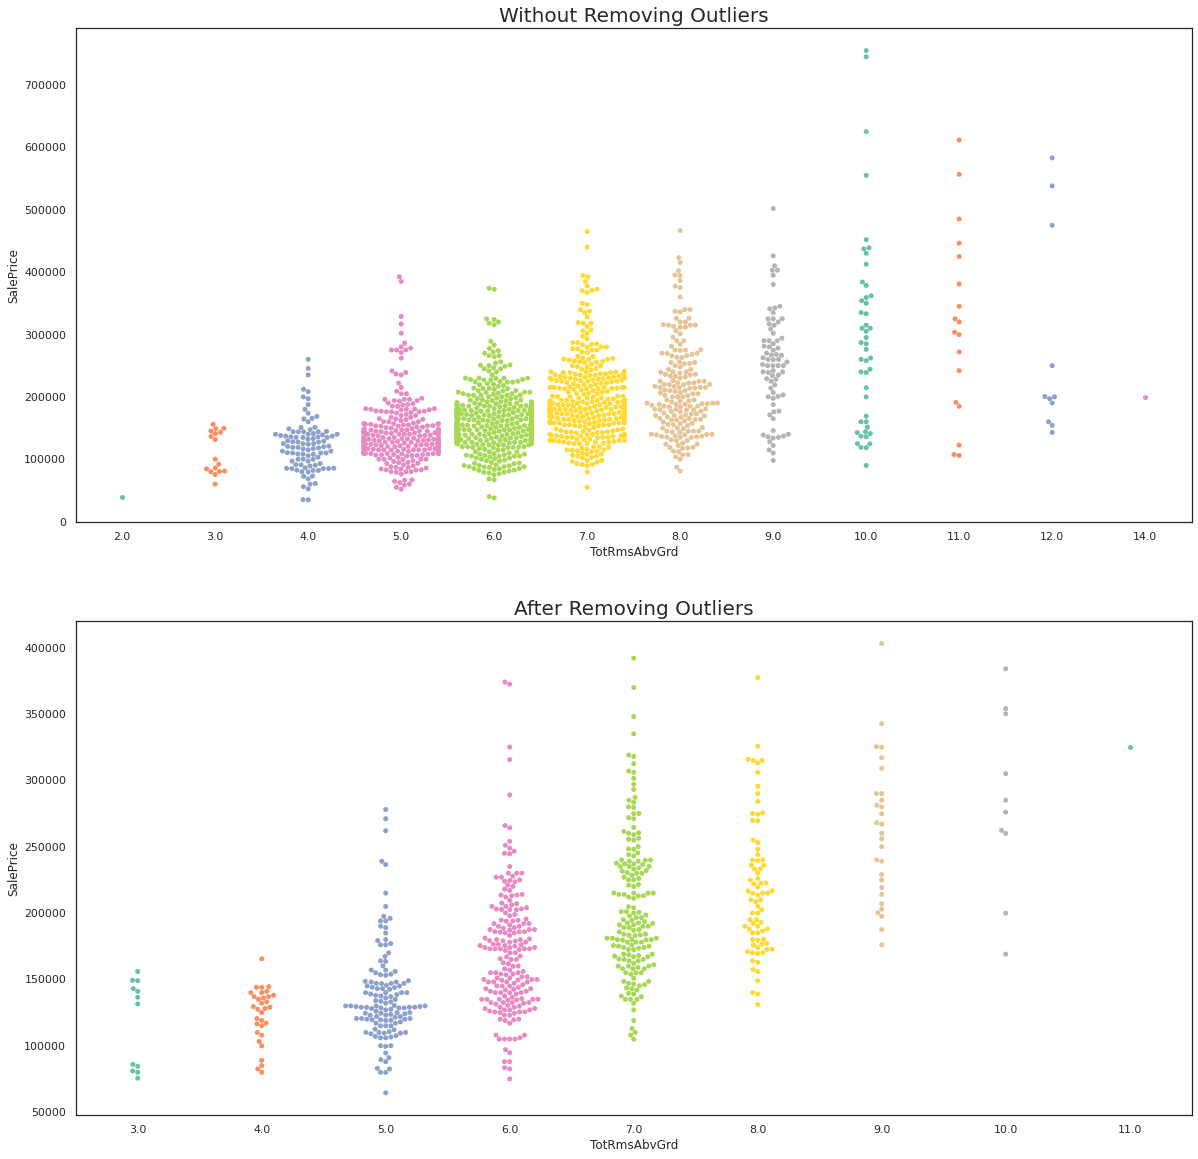

In [52]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), nrows=2, sharey=False)

sns.swarmplot(cleaned_train['TotRmsAbvGrd'], cleaned_train['SalePrice'],  palette="Set2",ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.swarmplot(cleaned_train_OL['TotRmsAbvGrd'],cleaned_train_OL['SalePrice'], palette="Set2",ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. The data points are mostly concentrated in and around type - 4,5,6,7 and 8 in the above figure.
### 2. The data points of each type are scattered and we have no type - 2,12 and 14 in the below figure.

# VIII) YearBuilt

In [53]:
cleaned_train['YearBuilt'].head()

0    2003.0
1    1976.0
2    2001.0
3    1915.0
4    2000.0
Name: YearBuilt, dtype: float64

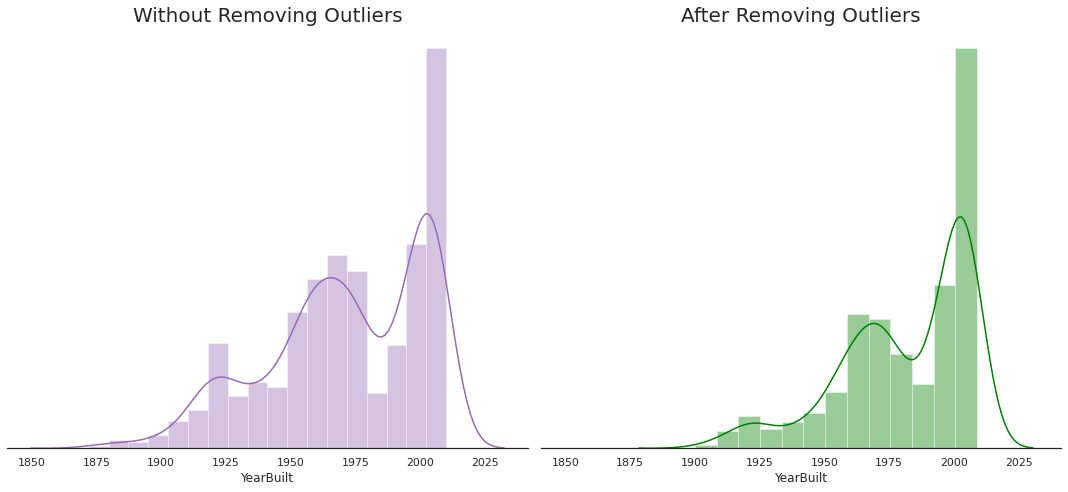

In [54]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)
sns.despine(left=True)
sns.distplot(cleaned_train['YearBuilt'], kde=True, color="m", ax=axes[0])
sns.distplot(cleaned_train_OL['YearBuilt'], kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

Text(0.5, 1.0, 'After Removing Outliers')

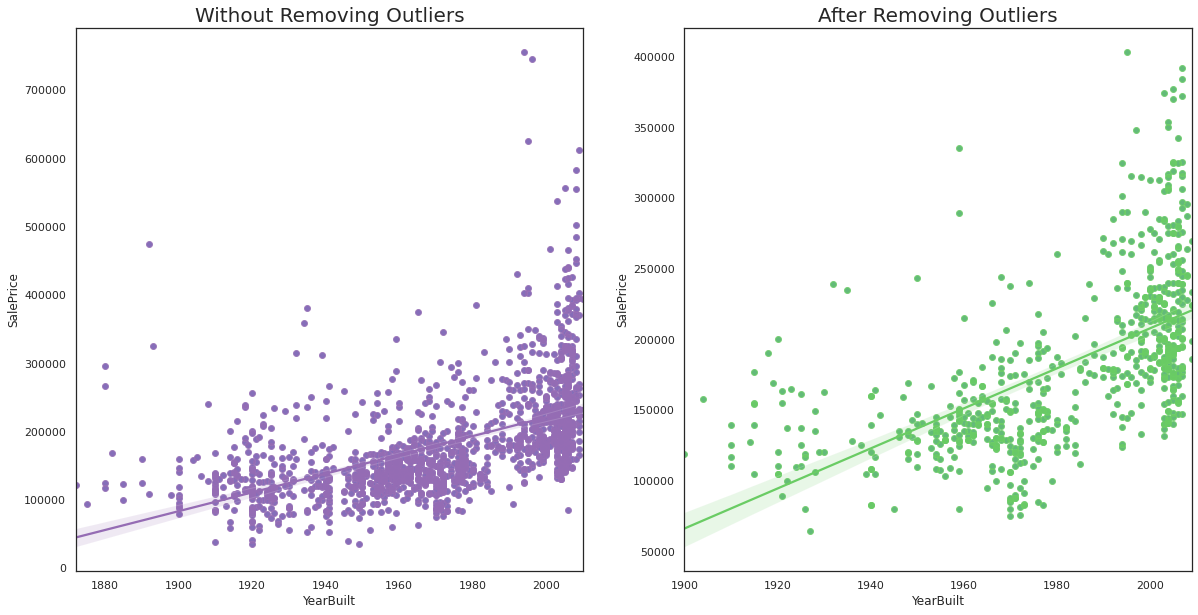

In [55]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,10), ncols=2, sharey=False)

sns.scatterplot(cleaned_train['YearBuilt'], cleaned_train['SalePrice'],  ax=ax1)
sns.regplot(cleaned_train['YearBuilt'], cleaned_train['SalePrice'], color ='m',ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.scatterplot(cleaned_train_OL['YearBuilt'],cleaned_train_OL['SalePrice'], ax=ax2)
sns.regplot(cleaned_train_OL['YearBuilt'],cleaned_train_OL['SalePrice'], color ='g',ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. In left plot the points are highly concentrated below the regression line and at the year 2000. We also note that from the year 2000 we see a surge in the SalePrice. 

### 2. In right plot the points are scattered almost equally above and below of the regression line and same as above from the year 2000 we see a surge in the SalePrice.

# IX) Foundation

In [56]:
cleaned_train['Foundation'].unique()

array([2, 1, 0, 5, 3, 4])

Text(0.5, 1.0, 'After Removing Outliers')

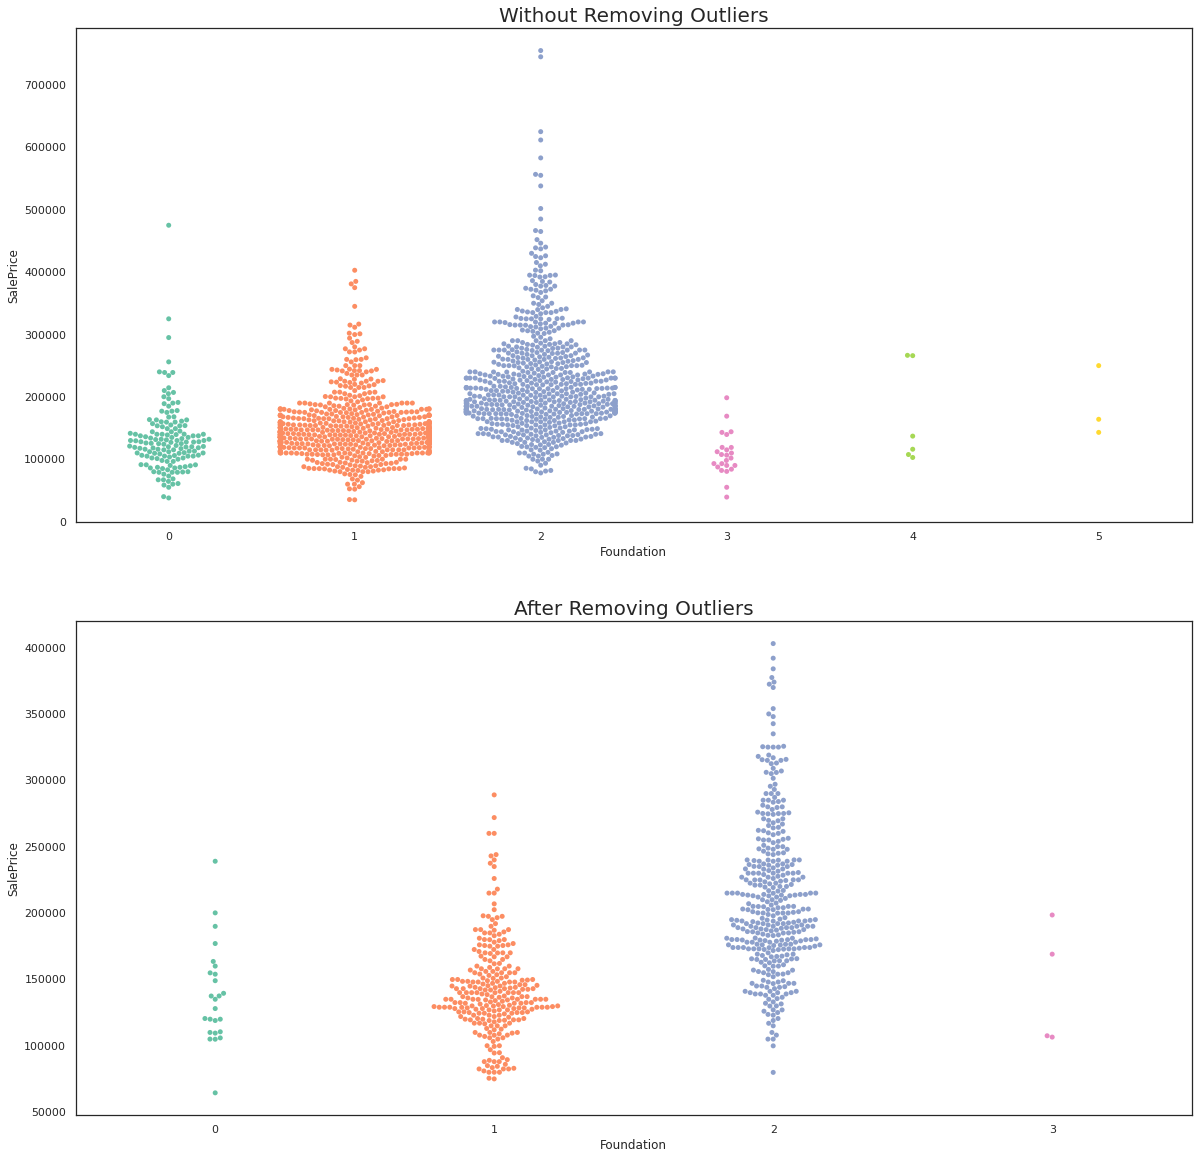

In [57]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,20), nrows=2, sharey=False)

sns.swarmplot(cleaned_train['Foundation'], cleaned_train['SalePrice'],  palette="Set2",ax=ax1)
ax1.set_title("Without Removing Outliers", size = 20)

sns.swarmplot(cleaned_train_OL['Foundation'],cleaned_train_OL['SalePrice'], palette="Set2",ax=ax2)
ax2.set_title("After Removing Outliers", size = 20)

## Observations:
### 1. The data points are mostly concentrated in and around Foundation type - 0,1 and 2 in the above figure.
### 2. The data points of each type are scattered and we have no type - 4 and 5 in the below figure.

In [58]:
y_OL = cleaned_train_OL['SalePrice']
X_OL = cleaned_train_OL.drop(['SalePrice'], axis = 1)

# R^2 Comparision
### What is R^2? 
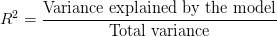
### R-squared is a goodness-of-fit measure for linear regression models. Usually, the larger the R^2, the better the regression model fits your observations.

### [Read More about R^2](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)

In [59]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X, y)

# Returning the R^2 for the model
cleaned_data_r2 = linear_model.score(X, y)
print('R^2: {0}'.format(cleaned_data_r2))

R^2: 0.8400675743917447


In [60]:
linear_model_OL = LinearRegression()

linear_model_OL.fit(X_OL, y_OL)

# Returning the R^2 for the model
cleaned_data_r2_OL = linear_model_OL.score(X_OL, y_OL)
print('R^2: {0}'.format(cleaned_data_r2_OL))

R^2: 0.9133637217772612


## Observation:
###  R^2 has improved after removing the Outliers from the data.

# Assumptions for Linear Regression
### For a model to fit for a perfect Linear Regression we need to check the followig assumptions:
#### I. Linear Relationship
#### II. Normality of the Error Terms
#### III. Multicollinearity
#### IV. Homoscedasticity
### [Read More about Assumptions](https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)

# I) Linear Relationship
### This assumes that there is a linear relationship between the predictors and the target variable.

In [61]:
def calculate_residuals(model, features, label):
   
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [62]:
def linear_assumption(model, features, label):
    df_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

### Linear assumption of Original Data

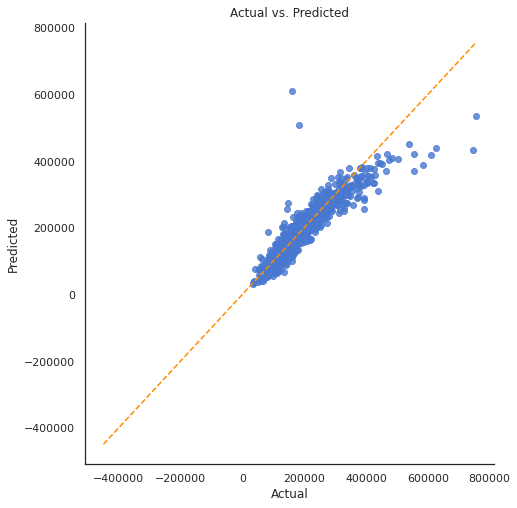

In [63]:
linear_assumption(linear_model, X, y)

### Linear assumption of after removal of Outliers from the Data

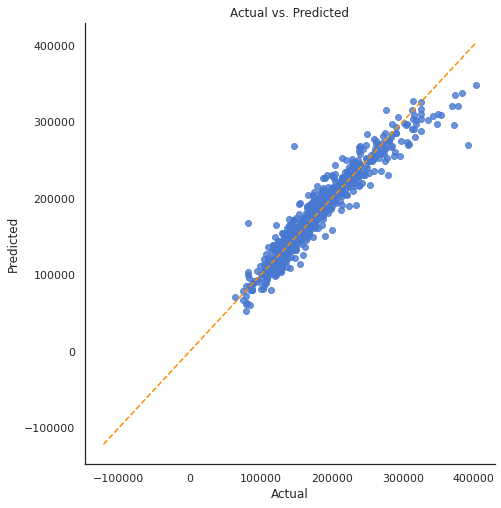

In [64]:
linear_assumption(linear_model_OL, X_OL, y_OL)

## Observations:
### 1. In the first plot the values are not much scattered and concentrated at a place of the line.
### 2. In the second plot the values are scattered along the line and very few values are out of the group.

# II) Normality of the Error Terms
### This assumes that the error terms of the model are normally distributed.

In [65]:
def normal_errors_assumption(model, features, label):
    df_results = calculate_residuals(model, features, label)
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

### Checking Normality of the Error Terms for Original Data 

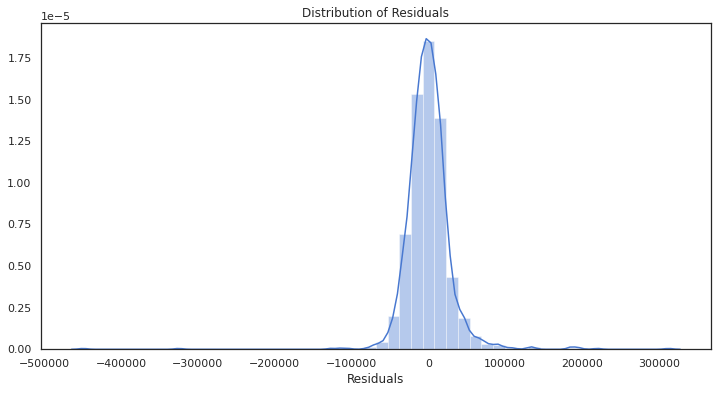

In [66]:
normal_errors_assumption(linear_model, X, y)

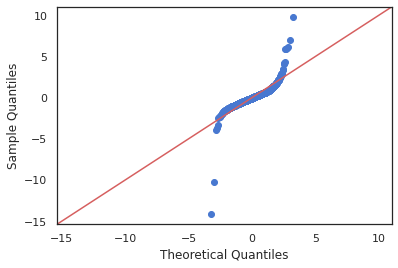

In [67]:
import statsmodels.api as sm
mod_fit = sm.OLS(y,X).fit()
res = mod_fit.resid
fig = sm.qqplot(res, fit = True, line = '45')
plt.show()

### Checking  Normality of the Error Terms after removing Outliers from the Data   

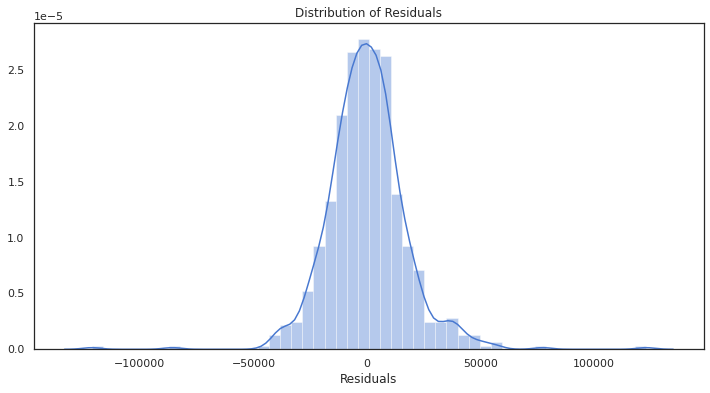

In [68]:
normal_errors_assumption(linear_model_OL, X_OL, y_OL)

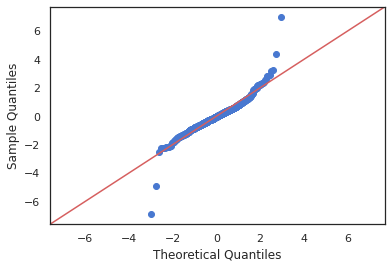

In [69]:
import statsmodels.api as sm
mod_fit = sm.OLS(y_OL,X_OL).fit()
res = mod_fit.resid
fig = sm.qqplot(res, fit = True, line = '45')
plt.show()

## Observation:
### 1. In the first graph the curve looks like Normal but still there is some data in the tails of the distribution.
### 2. Second graph looks like it is following the Normal distribution but still it has some outliers.

# III) Multicollinearity 

### This assumes that the features used in the regression are not correlated with each other.

Text(0.5, 1.0, 'Heatmap of all the Features')

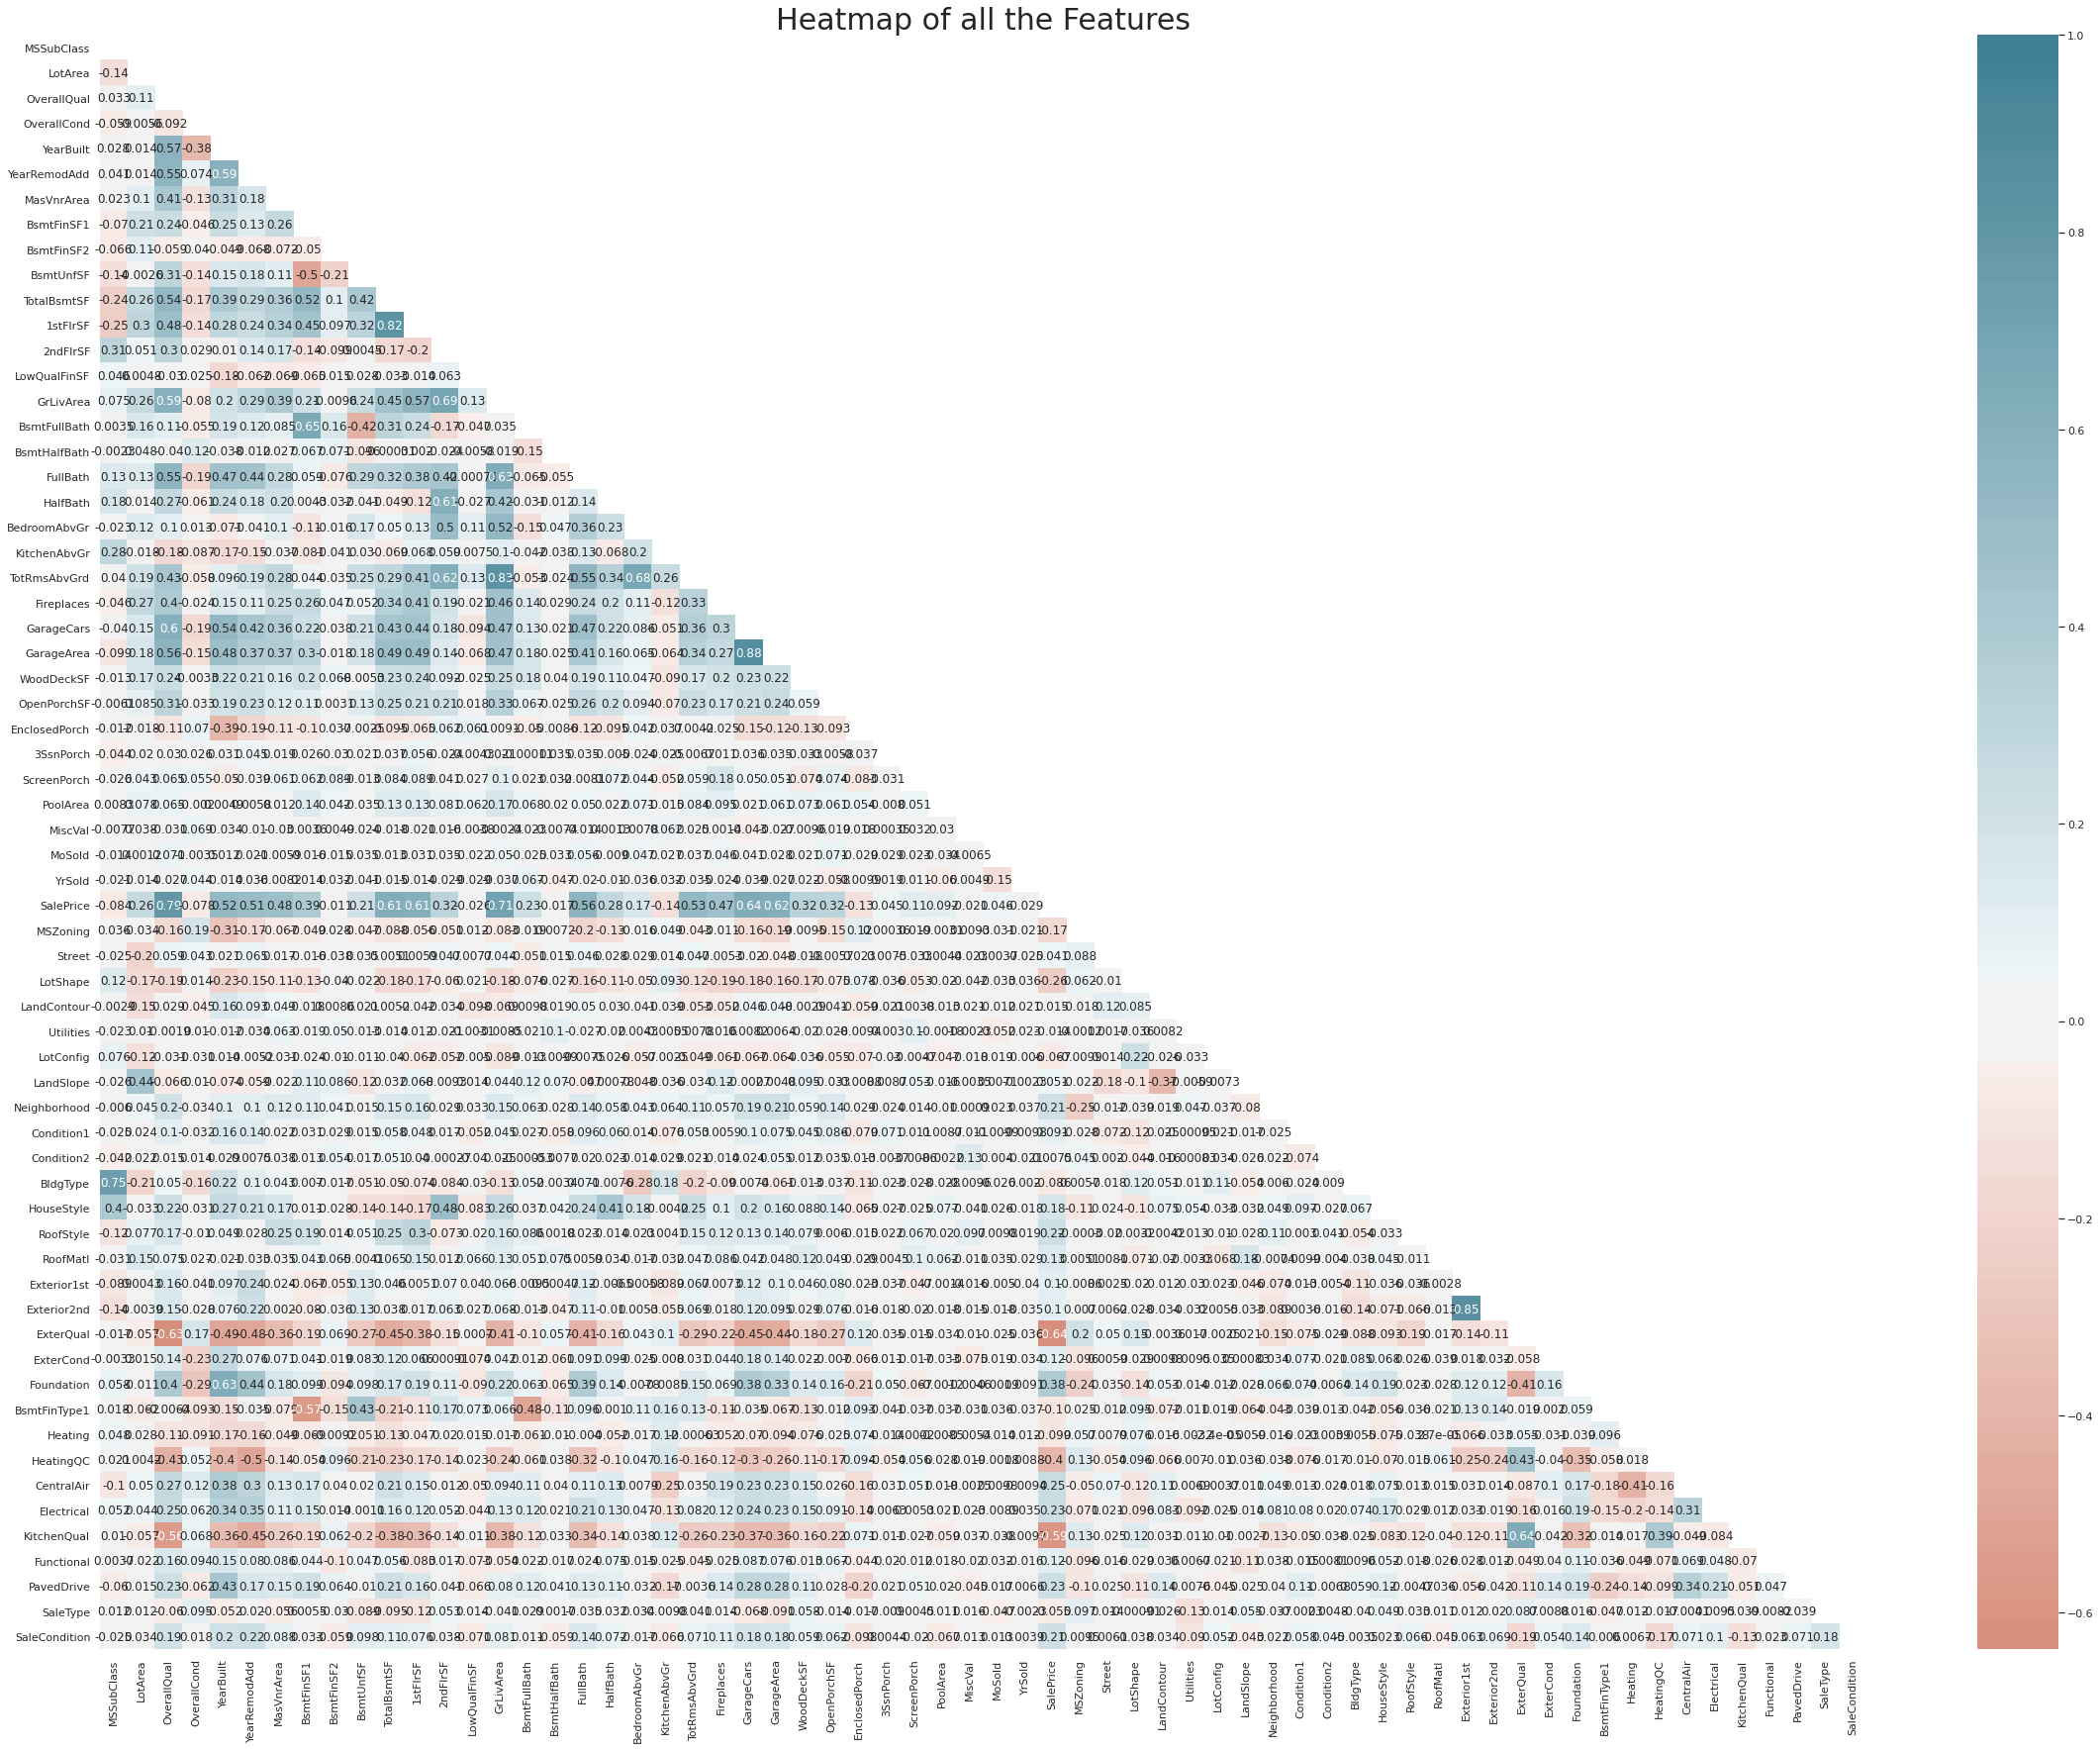

In [70]:
sns.set_style('whitegrid')
plt.subplots(figsize = (40,30))

mask = np.zeros_like(cleaned_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(cleaned_train.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           )
plt.title("Heatmap of all the Features", fontsize = 30)

## Observations:
### Few of the features have correlated with eachother. We can remove one of the feature and keep one or we can combine both and create a new feature. All these is a part of feature engineering, but we avoid those and move-on for now.

# IV) Homoscedasticity

### This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.


### Residual Plot for the Original Data 

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


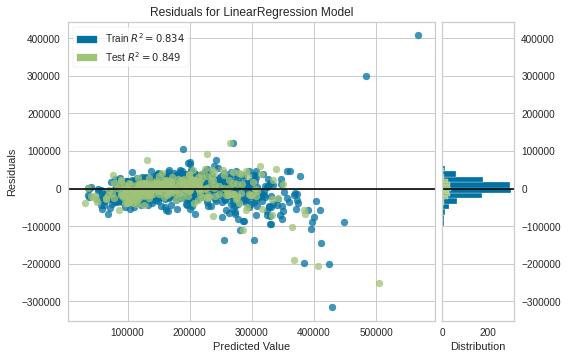

In [71]:
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.show()             

## Observation:
### The data points are much concentrated towards the left and we can see most of the right side of the graph is empty. They are not equally scattered. Rick of Heteroscedasticity.

### Residual Plot  after removing Outliers from the Data  

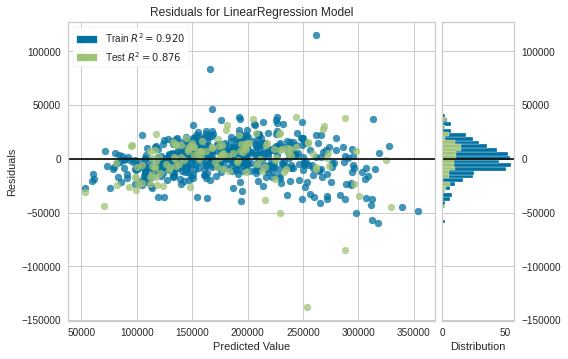

In [72]:
X_train_OL, X_test_OL, y_train_OL, y_test_OL = train_test_split(X_OL, y_OL, test_size=0.2, random_state=42)

model_OL = LinearRegression()
visualizer = ResidualsPlot(model_OL)

visualizer.fit(X_train_OL, y_train_OL)  # Fit the training data to the visualizer
visualizer.score(X_test_OL, y_test_OL)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Observation:
### First thing we notice here is the improvement of R^2 on both the train and test data. Data points are equally distributed from left to right and above and below the line. This shows some Homoscedasticity.

### How about we transform our target Variable "SalePrice" to "log(SalePrice)"

In [73]:
log_saleprice_OL = np.log1p(cleaned_train_OL["SalePrice"]) 
log_saleprice = np.log1p(cleaned_train["SalePrice"])

### How this transformation effected for SalePrice distribution?

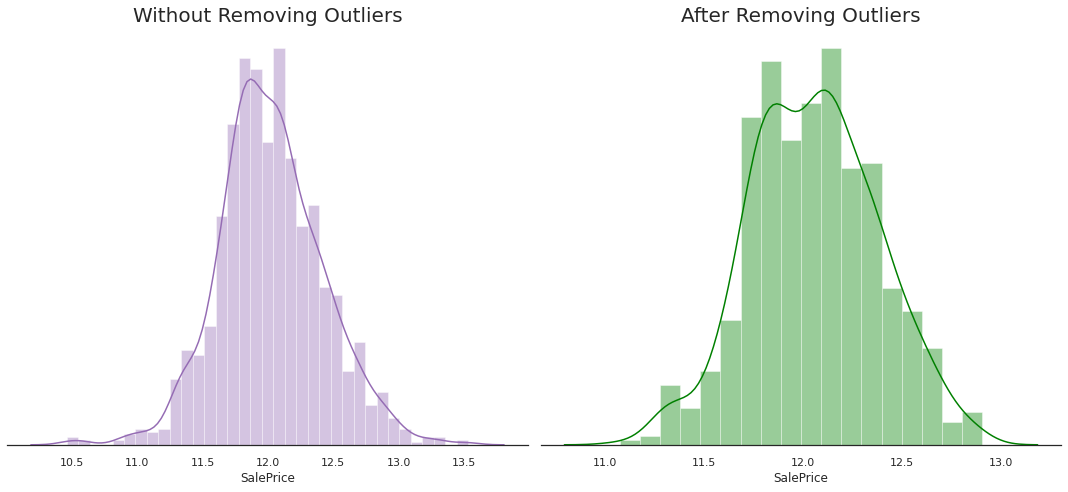

In [74]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=False)
sns.despine(left=True)
sns.distplot(log_saleprice, kde=True, color="m", ax=axes[0])
sns.distplot(log_saleprice_OL, kde=True, color="green", ax=axes[1])
axes[0].set_title("Without Removing Outliers", size= 20)
axes[1].set_title("After Removing Outliers", size= 20)
plt.setp(axes, yticks=[])
plt.tight_layout()

## Observation:
### The width of the curve has increased and most likely to be  Normal curve shape except for the unusual dip at the peak 

### Residual Plot for the Original Data applying Log transformation 

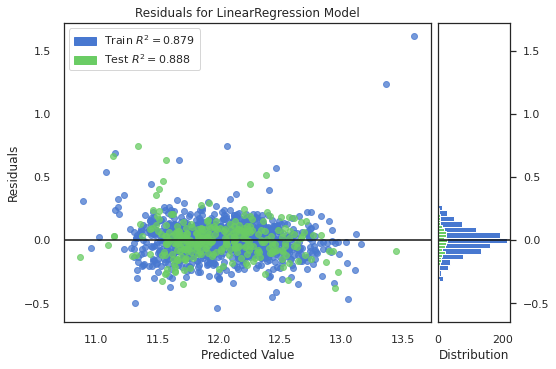

In [75]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, log_saleprice, test_size=0.2, random_state=42)

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_n, y_train_n)  # Fit the training data to the visualizer
visualizer.score(X_test_n, y_test_n)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Residual Plot after removing Outliers from the Data and applying Log transformation  

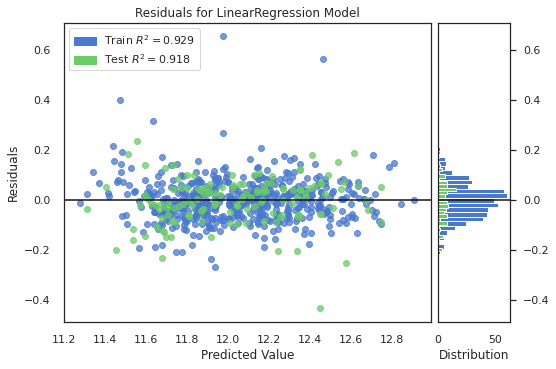

In [76]:
X_train_n_OL, X_test_n_OL, y_train_n_OL, y_test_n_OL = train_test_split(X_OL, log_saleprice_OL, 
                                                                        test_size=0.2, random_state=42)

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train_n_OL, y_train_n_OL)  
visualizer.score(X_test_n_OL, y_test_n_OL)  
visualizer.show()              

# Trying on different Models 

### Now we have FOUR different datasets:
1. Original Dataset
2. Original Dataset after removing Outliers
3. Log of Original Dataset
4. Log Original Dataset after removing Outliers


## Checking R^2 's 

In [77]:
def model_scores(x_train, y_train, x_test, y_test):
    lr = LinearRegression().fit(x_train, y_train)
    print('LinearRegression R^2: {0}'.format(lr.score(x_test, y_test)))
    ridge = Ridge().fit(x_train, y_train)
    print('Ridge Regression R^2: {0}'.format(ridge.score(x_test, y_test)))
    lasso = Lasso().fit(x_train, y_train)
    print('Lasso Regression R^2: {0}'.format(lasso.score(x_test, y_test)))
    rf = RandomForestRegressor().fit(x_train, y_train)
    print('RF Regression R^2: {0}'.format(rf.score(x_test, y_test)))

In [78]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [79]:
print("R^2's for Original Dataset")
model_scores(X_train, y_train, X_test, y_test)

R^2's for Original Dataset
LinearRegression R^2: 0.8489964672506509
Ridge Regression R^2: 0.8488388512683112
Lasso Regression R^2: 0.8489850352907897
RF Regression R^2: 0.8967064181174025


In [80]:
print("R^2's for Log of Original Dataset")
model_scores(X_train_n, y_train_n, X_test_n, y_test_n)

R^2's for Log of Original Dataset
LinearRegression R^2: 0.8877957606980811
Ridge Regression R^2: 0.8876306216198975
Lasso Regression R^2: 0.8018261053189001
RF Regression R^2: 0.888125524186807


In [81]:
print("R^2's for Original Dataset After removing Outliers")
model_scores(X_train_OL, y_train_OL, X_test_OL, y_test_OL)

R^2's for Original Dataset After removing Outliers
LinearRegression R^2: 0.875905715191295
Ridge Regression R^2: 0.8753578980942733
Lasso Regression R^2: 0.875837329423622
RF Regression R^2: 0.8171123660036967


In [82]:
print("R^2's for Log of Original Dataset After removing Outliers")
model_scores(X_train_n_OL, y_train_n_OL, X_test_n_OL, y_test_n_OL)

R^2's for Log of Original Dataset After removing Outliers
LinearRegression R^2: 0.9183637457118523
Ridge Regression R^2: 0.9186363909104651
Lasso Regression R^2: 0.8408037316787886
RF Regression R^2: 0.8809885051280938


## Checking msle's

In [83]:
lr = LinearRegression().fit(X_train_n_OL, y_train_n_OL)
pred1 = lr.predict(X_test_n_OL)
print('LinearRegression msle: {0}'.format(np.sqrt(mean_squared_log_error(y_test_n_OL, pred1))))

LinearRegression msle: 0.0071665732497433795


In [84]:
ridge = Ridge().fit(X_train_n_OL, y_train_n_OL)
pred2 = ridge.predict(X_test_n_OL)
print('Ridge Regression msle: {0}'.format(np.sqrt(mean_squared_log_error(y_test_n_OL, pred2))))

Ridge Regression msle: 0.007153068198267868


In [85]:
lasso = Lasso().fit(X_train_n_OL, y_train_n_OL)
pred3 = lasso.predict(X_test_n_OL)
print('Lasso Regression msle: {0}'.format(np.sqrt(mean_squared_log_error(y_test_n_OL, pred3))))

Lasso Regression msle: 0.009996023580332187


In [86]:
rf = RandomForestRegressor().fit(X_train_n_OL, y_train_n_OL)
pred3 = rf.predict(X_test_n_OL)
print('RF Regression msle: {0}'.format(np.sqrt(mean_squared_log_error(y_test_n_OL, pred3))))

RF Regression msle: 0.008591435610175129


## Optimising Ridge 

In [87]:
def msle_score_ridge(alpha):
    ridge = Ridge(alpha).fit(X_train_n_OL, y_train_n_OL)
    pred2 = ridge.predict(X_test_n_OL)
    score_ridge = np.sqrt(mean_squared_log_error(y_test_n_OL, pred2))
    return(score_ridge)

In [88]:
scores_ridge = {}
for i in [0.001, 0.01, 0.1, 1, 10, 100]:
    scores_ridge[i] = msle_score_ridge(i)

In [89]:
scores_ridge

{0.001: 0.007166554944765243,
 0.01: 0.007166390775605038,
 0.1: 0.0071648042197588035,
 1: 0.007153068198267868,
 10: 0.007131819918379655,
 100: 0.007291619234558652}

In [90]:
ridge = Ridge(alpha = 10).fit(X_train_n_OL, y_train_n_OL)
pred2 = ridge.predict(X_test_n_OL)
score_ridge = np.sqrt(mean_squared_log_error(y_test_n_OL, pred2))
print(score_ridge)

0.007131819918379655


In [91]:
pred = ridge.predict(cleaned_test)
back  = np.e**pred

In [92]:
output = pd.DataFrame({'Id': test_Id,
                       'SalePrice': back})
output.to_csv('submission.csv', index=False)